In [ ]:
import torch
import torch.nn as nn
import random
import numpy as np
import math

## Data Loading

In [ ]:
import pickle
with open('new_dat64.pkl', 'rb') as config_dictionary_file:
    raw_data = pickle.load(config_dictionary_file)

FileNotFoundError: ignored

In [ ]:
import torch
from torch.utils.data import Dataset, DataLoader
import numpy as np

In [ ]:
class PathDataset(Dataset):
  def __init__(self, raw_data, predict = 3, scenes = 18, wrap_around = 7):
    self.raw_data = raw_data
    self.predict = predict
    self.TYPE_OF_AGENTS = 5
    self.wrap_around = wrap_around
    self.vertical_transform = True
    self.scenes = scenes
    self.W = 900
    self.H = 1600

  def __len__(self):
    return len(self.raw_data) * self.wrap_around
  

  def generate_rotations(self):
    
    if self.vertical_transform:
      self.right = np.random.randint(0, 2) == 0
      self.up = np.random.randint(0, 3) > 0
    else:
      self.right = False
      self.up = False

  def set_vertical_transform(self, state = True):
    self.vertical_transform = state


  def convert_to_centralised(self, input, out):
      main_vehich

  def __getitem__(self, idx):
    idx = (idx // self.wrap_around) 
    if idx < 3:
      idx += 3

    final_data = np.zeros((self.scenes, 15 * (self.TYPE_OF_AGENTS + 2)))
    final_out = np.zeros((self.predict, 15 * (self.TYPE_OF_AGENTS + 2)))

    data_idx = 0

    self.generate_rotations()
    
    for one_path in self.raw_data[idx+1].values():
        ## If we don't have enough data we skip
        if one_path['len'] < self.predict + 1:
            continue

        

        ## Getting type in one hot  
        agent_type = one_path['type']
        type_one_hot = [0] * self.TYPE_OF_AGENTS 
        type_one_hot[agent_type-1] = 1

        ## Repeating 3 values with -1
        for l in range(self.predict):
          final_data[12 - l - 1][data_idx*7: (data_idx+1)* 7] = (type_one_hot + [-1, -1])

        ## Filling uptil 12 values in data
        a = self.scenes - self.predict - 1
        for coord in zip(one_path['xs'][self.predict: self.scenes], one_path['ys'][self.predict:self.scenes]):
            if coord[0] != -1:
              coord= coord[0]/self.H, coord[1]/self.W
              if self.up:
                coord = coord[0], 1 - coord[1]
              if self.right : 
                coord = 1 - coord[0], coord[1]

            final_data[a][data_idx*7: (data_idx+1)* 7]= type_one_hot + [coord[0], coord[1]]
            a = a - 1

        ## filling output with 3 data
        b = self.predict - 1
        for coord in zip(one_path['xs'][:self.predict], one_path['ys'][:self.predict]):
            coord= coord[0]/self.H, coord[1]/self.W
            if self.up:
              coord = coord[0], 1 - coord[1]
            if self.right : 
              coord = 1 - coord[0], coord[1]
            final_out[b][data_idx*7: (data_idx+1)* 7]= type_one_hot + [coord[0], coord[1]]
            b = b - 1
      
        data_idx += 1
        if data_idx == 15:
          break

    ## Swapping one of the elements with 0 to make it main agent
    main_agent = np.random.randint(0, max(data_idx, 1))

    final_data[:, 0:7], final_data[:, main_agent*7: (main_agent+1)*7] = final_data[:, main_agent*7: (main_agent+1)*7], final_data[:, 0:7]
    final_out[:, 0:7], final_out[:, main_agent*7: (main_agent+1)*7] = final_out[:, main_agent*7: (main_agent+1)*7], final_out[:, 0:7]



    return final_data, final_out[:,5:7]   ## We only need output of main agent

  def get_frame_idx(self, idx):
    idx = (idx // self.wrap_around) 
    if idx < 3:
      idx += 3

    return idx

In [ ]:
class PathDataset2(Dataset):
  def __init__(self, raw_data, predict = 3, scenes = 18, wrap_around = 7, full = True, isolated = False):
    self.raw_data = raw_data
    self.predict = predict
    self.TYPE_OF_AGENTS = 5
    self.wrap_around = wrap_around
    self.vertical_transform = True
    self.scenes = scenes
    self.W = 900
    self.H = 1600
    self.full = full
    self.isolated = isolated

  def __len__(self):
    return len(self.raw_data) * self.wrap_around
  

  def generate_rotations(self):
    
    if self.vertical_transform:
      self.right = np.random.randint(0, 2) == 0
      self.up = np.random.randint(0, 2) == 0
    else:
      self.right = False
      self.up = False

  def set_vertical_transform(self, state = True):
    self.vertical_transform = state


  def convert_to_centralised(self, input, out):
      main_vehich

  def __getitem__(self, idx):
    idx = (idx // self.wrap_around) 
    if idx < 3:
      idx += 3

    final_data = np.zeros((self.scenes, 15 * (self.TYPE_OF_AGENTS + 2)))
    final_out = np.zeros((self.scenes, 15 * (self.TYPE_OF_AGENTS + 2)))
    # final_out2 = np.zeros((self.predict, 15 * (self.TYPE_OF_AGENTS + 2)))
    data_idx = 0

    self.generate_rotations()
    lim = [-1] * 15
    for one_path in self.raw_data[idx+1].values():
        ## If we don't have enough data we skip
        if one_path['len'] < self.predict + 1:
            continue

        ## Getting type in one hot  
        agent_type = one_path['type']
        type_one_hot = [0] * self.TYPE_OF_AGENTS 
        type_one_hot[agent_type-1] = 1

        ## Repeating 3 values with -1

        for l in range(self.predict):
          final_data[self.scenes - l - 1][data_idx*7: (data_idx+1)* 7] = (type_one_hot + [-1, -1])
          coord = one_path['xs'][l], one_path['ys'][l]
         
          coord= coord[0]/self.H, coord[1]/self.W
          if self.up:
            coord = coord[0], 1 - coord[1]
          if self.right : 
            coord = 1 - coord[0], coord[1]
          final_out[self.scenes - l - 1][data_idx*7: (data_idx + 1) * 7] = (type_one_hot) + [coord[0], coord[1]]
        ## Filling uptil 12 values in data

        a = self.scenes - self.predict - 1
        
        for coord in zip(one_path['xs'][self.predict: self.scenes], one_path['ys'][self.predict:self.scenes]):
            if coord[0] != -1 and coord[1] != -1:
              coord= coord[0]/self.H, coord[1]/self.W
              if self.up:
                coord = coord[0], 1 - coord[1]
              if self.right : 
                coord = 1 - coord[0], coord[1]
            elif lim[data_idx] == -1:
              lim[data_idx] = a
            final_data[a][data_idx*7: (data_idx+1)* 7]= type_one_hot + [coord[0], coord[1]]
            final_out[a][data_idx*7: (data_idx+1)* 7]= type_one_hot + [coord[0], coord[1]]
            a = a - 1

        # a = self.scenes - self.predict - 1
        # for coord in zip(one_path['xs'][self.predict: self.scenes], one_path['ys'][self.predict:self.scenes]):
        #     if coord[0] != -1:
        #       coord= coord[0]/self.H, coord[1]/self.W
        #       if self.up:
        #         coord = coord[0], 1 - coord[1]
        #       if self.right : 
        #         coord = 1 - coord[0], coord[1]
        #     elif lim[data_idx] == -1:
        #       lim[data_idx] = a
        #     # final_data[a][data_idx*7: (data_idx+1)* 7]= type_one_hot + [coord[0], coord[1]]
        #     final_out[a][data_idx*7: (data_idx+1)* 7]= type_one_hot + [coord[0], coord[1]]
        #     a = a - 1
        ## filling output with 3 data

        # b = self.predict - 1
        # for coord in zip(one_path['xs'][:self.predict], one_path['ys'][:self.predict]):
        #     coord= coord[0]/self.H, coord[1]/self.W
        #     if self.up:
        #       coord = coord[0], 1 - coord[1]
        #     if self.right : 
        #       coord = 1 - coord[0], coord[1]
        #     final_out2[b][data_idx*7: (data_idx+1)* 7]= type_one_hot + [coord[0], coord[1]]
        #     b = b - 1
      
        data_idx += 1
        if data_idx == 15:
          break

    ## Swapping one of the elements with 0 to make it main agent
    main_agent = np.random.randint(0, max(data_idx, 1))

    final_data[:, 0:7], final_data[:, main_agent*7: (main_agent+1)*7] = final_data[:, main_agent*7: (main_agent+1)*7], final_data[:, 0:7]
    final_out[:, 0:7], final_out[:, main_agent*7: (main_agent+1)*7] = final_out[:, main_agent*7: (main_agent+1)*7], final_out[:, 0:7]

    if self.isolated:
        final_data[:, 7:] = -1
        
        angle = np.random.randint(-1,2)*math.pi/(np.random.randint(900, 3600)/100)
        
        new_x = final_data[lim[main_agent] + 1:-5, 5]*math.cos(angle) - final_data[lim[main_agent] + 1:-5, 6]*math.sin(angle)
        new_y = final_data[ lim[main_agent] + 1:-5, 6]*math.cos(angle) + final_data[lim[main_agent] + 1:-5, 5]*math.sin(angle)
        final_data[lim[main_agent] + 1:-5, 5] = new_x
        final_data[lim[main_agent] + 1:-5, 6] = new_y

        out_x =  final_out[lim[main_agent] + 1:,5]*math.cos(angle) - final_out[ lim[main_agent] + 1:,6]*math.sin(angle)
        out_y =  final_out[lim[main_agent] + 1:, 6]*math.cos(angle) + final_out[ lim[main_agent] + 1:,5]*math.sin(angle)
        final_out[ lim[main_agent] + 1:,5] = out_x
        final_out[ lim[main_agent] + 1:,6] = out_y

    return final_data[lim[main_agent] + 1:,:], final_out[lim[main_agent] + 1 :,5:7], 0   ## We only need output of main agent


  def get_frame_idx(self, idx):
    idx = (idx // self.wrap_around) 
    if idx < 3:
      idx += 3

    return idx

In [ ]:
class PathDataset3(Dataset):
  def __init__(self, raw_data, predict = 3, scenes = 18, wrap_around = 7, full = True, isolated = False):
    self.raw_data = raw_data
    self.predict = predict
    self.TYPE_OF_AGENTS = 5
    self.wrap_around = wrap_around
    self.vertical_transform = True
    self.scenes = scenes
    self.W = 900
    self.H = 1600
    self.full = full
    self.isolated = isolated

  def __len__(self):
    return len(self.raw_data) * self.wrap_around
  

  def generate_rotations(self):
    
    if self.vertical_transform:
      self.right = np.random.randint(0, 2) == 0
      self.up = np.random.randint(0, 2) == 0
    else:
      self.right = False
      self.up = False

  def set_vertical_transform(self, state = True):
    self.vertical_transform = state


  def convert_to_centralised(self, input, out):
      main_vehich

  def __getitem__(self, idx):
    idx = (idx // self.wrap_around) 
    if idx < 3:
      idx += 3

    final_data = np.zeros((self.scenes, 15 * (self.TYPE_OF_AGENTS + 2)))
    final_out = np.zeros((self.scenes, 15 * (self.TYPE_OF_AGENTS + 2)))
    # final_out2 = np.zeros((self.predict, 15 * (self.TYPE_OF_AGENTS + 2)))
    data_idx = 0

    self.generate_rotations()
    lim = [-1] * 15
    for one_path in self.raw_data[idx+1].values():
        ## If we don't have enough data we skip
        if one_path['len'] < self.predict + 1:
            continue
        

        ## Getting type in one hot  
        agent_type = one_path['type']
        type_one_hot = [0] * self.TYPE_OF_AGENTS 
        type_one_hot[agent_type-1] = 1

        ## Repeating 3 values with -1

        for l in range(self.predict):
          final_data[self.scenes - l - 1][data_idx*7: (data_idx+1)* 7] = (type_one_hot + [-1, -1])
          coord = one_path['xs'][l], one_path['ys'][l]
         
          coord= coord[0]/self.H, coord[1]/self.W
          if self.up:
            coord = coord[0], 1 - coord[1]
          if self.right : 
            coord = 1 - coord[0], coord[1]
          final_out[self.scenes - l - 1][data_idx*7: (data_idx + 1) * 7] = (type_one_hot) + [coord[0], coord[1]]
        ## Filling uptil 12 values in data

        a = self.scenes - self.predict - 1
        
        for coord in zip(one_path['xs'][self.predict: self.scenes], one_path['ys'][self.predict:self.scenes]):
            if coord[0] != -1 and coord[1] != -1:
              coord= coord[0]/self.H, coord[1]/self.W
              if self.up:
                coord = coord[0], 1 - coord[1]
              if self.right : 
                coord = 1 - coord[0], coord[1]
            elif lim[data_idx] == -1:
              lim[data_idx] = a
            final_data[a][data_idx*7: (data_idx+1)* 7]= type_one_hot + [coord[0], coord[1]]
            final_out[a][data_idx*7: (data_idx+1)* 7]= type_one_hot + [coord[0], coord[1]]
            a = a - 1

        # a = self.scenes - self.predict - 1
        # for coord in zip(one_path['xs'][self.predict: self.scenes], one_path['ys'][self.predict:self.scenes]):
        #     if coord[0] != -1:
        #       coord= coord[0]/self.H, coord[1]/self.W
        #       if self.up:
        #         coord = coord[0], 1 - coord[1]
        #       if self.right : 
        #         coord = 1 - coord[0], coord[1]
        #     elif lim[data_idx] == -1:
        #       lim[data_idx] = a
        #     # final_data[a][data_idx*7: (data_idx+1)* 7]= type_one_hot + [coord[0], coord[1]]
        #     final_out[a][data_idx*7: (data_idx+1)* 7]= type_one_hot + [coord[0], coord[1]]
        #     a = a - 1
        ## filling output with 3 data

        # b = self.predict - 1
        # for coord in zip(one_path['xs'][:self.predict], one_path['ys'][:self.predict]):
        #     coord= coord[0]/self.H, coord[1]/self.W
        #     if self.up:
        #       coord = coord[0], 1 - coord[1]
        #     if self.right : 
        #       coord = 1 - coord[0], coord[1]
        #     final_out2[b][data_idx*7: (data_idx+1)* 7]= type_one_hot + [coord[0], coord[1]]
        #     b = b - 1
      
        data_idx += 1
        if data_idx == 15:
          break

    ## Swapping one of the elements with 0 to make it main agent
    main_agent = np.random.randint(0, max(data_idx, 1))

    final_data[:, 0:7], final_data[:, main_agent*7: (main_agent+1)*7] = final_data[:, main_agent*7: (main_agent+1)*7], final_data[:, 0:7]
    final_out[:, 0:7], final_out[:, main_agent*7: (main_agent+1)*7] = final_out[:, main_agent*7: (main_agent+1)*7], final_out[:, 0:7]

    if self.isolated:
        final_data[:, 7:] = -1
        
        angle = np.random.randint(-1,2)*math.pi/(np.random.randint(600, 3600)/100)
        
        new_x = final_data[ lim[main_agent] + 1:-5, 5]*math.cos(angle) - final_data[lim[main_agent] + 1:-5, 6]*math.sin(angle)
        new_y = final_data[ lim[main_agent] + 1:-5, 6]*math.cos(angle) + final_data[lim[main_agent] + 1:-5, 5]*math.sin(angle)
        final_data[lim[main_agent] + 1:-5, 5] = new_x
        final_data[lim[main_agent] + 1:-5, 6] = new_y

        out_x =  final_out[lim[main_agent] + 1:,5]*math.cos(angle) - final_out[ lim[main_agent] + 1:,6]*math.sin(angle)
        out_y =  final_out[lim[main_agent] + 1:, 6]*math.cos(angle) + final_out[ lim[main_agent] + 1:,5]*math.sin(angle)
        final_out[ lim[main_agent] + 1:,5] = out_x
        final_out[ lim[main_agent] + 1:,6] = out_y

    return final_data[lim[main_agent] + 1:,:], final_out[lim[main_agent] + 1 :,5:7], 0   ## We only need output of main agent


  def getitem(self, idx, main_agent):
    idx = (idx // self.wrap_around) 
    if idx < 3:
      idx += 3

    final_data = np.zeros((self.scenes, 15 * (self.TYPE_OF_AGENTS + 2)))
    final_out = np.zeros((self.scenes, 15 * (self.TYPE_OF_AGENTS + 2)))
    # final_out2 = np.zeros((self.predict, 15 * (self.TYPE_OF_AGENTS + 2)))
    data_idx = 0

    self.generate_rotations()
    lim = [-1] * 15
    for one_path in self.raw_data[idx+1].values():
        ## If we don't have enough data we skip
        if one_path['len'] < self.predict + 1:
            continue
        
        if one_path["ys"][0]/self.W<-0.2:
            continue

        ## Getting type in one hot  
        agent_type = one_path['type']
        type_one_hot = [0] * self.TYPE_OF_AGENTS 
        type_one_hot[agent_type-1] = 1

        ## Repeating 3 values with -1

        for l in range(self.predict):
          final_data[self.scenes - l - 1][data_idx*7: (data_idx+1)* 7] = (type_one_hot + [-1, -1])
          coord = one_path['xs'][l], one_path['ys'][l]
         
          coord= coord[0]/self.H, coord[1]/self.W
          if self.up:
            coord = coord[0], 1 - coord[1]
          if self.right : 
            coord = 1 - coord[0], coord[1]
          final_out[self.scenes - l - 1][data_idx*7: (data_idx + 1) * 7] = (type_one_hot) + [coord[0], coord[1]]
        ## Filling uptil 12 values in data

        a = self.scenes - self.predict - 1
        
        for coord in zip(one_path['xs'][self.predict: self.scenes], one_path['ys'][self.predict:self.scenes]):
            if coord[0] != -1 and coord[1] != -1:
              coord= coord[0]/self.H, coord[1]/self.W
              if self.up:
                coord = coord[0], 1 - coord[1]
              if self.right : 
                coord = 1 - coord[0], coord[1]
            elif lim[data_idx] == -1:
              lim[data_idx] = a
            final_data[a][data_idx*7: (data_idx+1)* 7]= type_one_hot + [coord[0], coord[1]]
            final_out[a][data_idx*7: (data_idx+1)* 7]= type_one_hot + [coord[0], coord[1]]
            a = a - 1

        # a = self.scenes - self.predict - 1
        # for coord in zip(one_path['xs'][self.predict: self.scenes], one_path['ys'][self.predict:self.scenes]):
        #     if coord[0] != -1:
        #       coord= coord[0]/self.H, coord[1]/self.W
        #       if self.up:
        #         coord = coord[0], 1 - coord[1]
        #       if self.right : 
        #         coord = 1 - coord[0], coord[1]
        #     elif lim[data_idx] == -1:
        #       lim[data_idx] = a
        #     # final_data[a][data_idx*7: (data_idx+1)* 7]= type_one_hot + [coord[0], coord[1]]
        #     final_out[a][data_idx*7: (data_idx+1)* 7]= type_one_hot + [coord[0], coord[1]]
        #     a = a - 1
        ## filling output with 3 data

        # b = self.predict - 1
        # for coord in zip(one_path['xs'][:self.predict], one_path['ys'][:self.predict]):
        #     coord= coord[0]/self.H, coord[1]/self.W
        #     if self.up:
        #       coord = coord[0], 1 - coord[1]
        #     if self.right : 
        #       coord = 1 - coord[0], coord[1]
        #     final_out2[b][data_idx*7: (data_idx+1)* 7]= type_one_hot + [coord[0], coord[1]]
        #     b = b - 1
      
        data_idx += 1
        if data_idx == 15:
          break

    ## Swapping one of the elements with 0 to make it main agent
    if main_agent > data_idx:
      main_agnet = data_idx

    final_data[:, 0:7], final_data[:, main_agent*7: (main_agent+1)*7] = final_data[:, main_agent*7: (main_agent+1)*7], final_data[:, 0:7]
    final_out[:, 0:7], final_out[:, main_agent*7: (main_agent+1)*7] = final_out[:, main_agent*7: (main_agent+1)*7], final_out[:, 0:7]

    if self.isolated:
        final_data[:, 7:] = -1
        
        angle = np.random.randint(-1,2)*math.pi/(np.random.randint(900, 3600)/100)
        
        new_x = final_data[ lim[main_agent] + 1:-5, 5]*math.cos(angle) - final_data[lim[main_agent] + 1:-5, 6]*math.sin(angle)
        new_y = final_data[ lim[main_agent] + 1:-5, 6]*math.cos(angle) + final_data[lim[main_agent] + 1:-5, 5]*math.sin(angle)
        final_data[lim[main_agent] + 1:-5, 5] = new_x
        final_data[lim[main_agent] + 1:-5, 6] = new_y

        out_x =  final_out[lim[main_agent] + 1:,5]*math.cos(angle) - final_out[ lim[main_agent] + 1:,6]*math.sin(angle)
        out_y =  final_out[lim[main_agent] + 1:, 6]*math.cos(angle) + final_out[ lim[main_agent] + 1:,5]*math.sin(angle)
        final_out[ lim[main_agent] + 1:,5] = out_x
        final_out[ lim[main_agent] + 1:,6] = out_y

    return final_data[lim[main_agent] + 1:,:], final_out[lim[main_agent] + 1 :,5:7], 0  

  def get_frame_idx(self, idx):
    idx = (idx // self.wrap_around) 
    if idx < 3:
      idx += 3

    return idx

In [ ]:
PREDICT_SIZE = 7
SCENE_SIZE = 63
dat = PathDataset3(raw_data, PREDICT_SIZE, SCENE_SIZE, isolated=True)
data_loader = DataLoader(dat, 
                         batch_size = 8,
                         shuffle = True,
                         num_workers = 1)

In [ ]:
idx = 4
for x, y, z in data_loader:
  # print("One batch")
  print(x.shape, y.shape)
  break

RuntimeError: ignored

In [ ]:
a, b, z = dat[80]
print(a[:, 0:7])
print(dat.up)
print(dat.right)
print('-------------------')
print(b)
print(z)

[[ 0.          1.          0.          0.          0.          0.62679349
   0.27377168]
 [ 0.          1.          0.          0.          0.          0.63081855
   0.24289673]
 [ 0.          1.          0.          0.          0.          0.63208252
   0.22181422]
 [ 0.          1.          0.          0.          0.         -0.90664024
  -1.08535868]
 [ 0.          1.          0.          0.          0.         -0.90664024
  -1.08535868]
 [ 0.          1.          0.          0.          0.         -1.
  -1.        ]
 [ 0.          1.          0.          0.          0.         -1.
  -1.        ]
 [ 0.          1.          0.          0.          0.         -1.
  -1.        ]
 [ 0.          1.          0.          0.          0.         -1.
  -1.        ]
 [ 0.          1.          0.          0.          0.         -1.
  -1.        ]]
False
True
-------------------
[[0.62679349 0.27377168]
 [0.63081855 0.24289673]
 [0.63208252 0.22181422]
 [0.63359862 0.21191008]
 [0.63894899 0.201

## Data Loading 2.0

In [ ]:
import pickle
with open('trajv.pkl', 'rb') as config_dictionary_file:
    raw_data = pickle.load(config_dictionary_file)

In [ ]:
import torch
from torch.utils.data import Dataset, DataLoader
import numpy as np

In [ ]:
class PathDataset3(Dataset):
  def __init__(self, raw_data, predict = 3, scenes = 18, wrap_around = 7, full = True, isolated = False, transform = True):
    self.raw_data = raw_data
    self.agents_in_scene, self.side_agents = self.get_data(raw_data)

    self.predict = predict
    self.TYPE_OF_AGENTS = 5
    self.wrap_around = wrap_around
    self.transform = transform
    self.AGENTS_PER_SCENE = 15
    self.scenes = scenes
    self.W = 900
    self.H = 1600
    self.full = full
    self.isolated = isolated

  def __len__(self):
    return len(self.raw_data) * self.wrap_around


  def get_data(self, raw_data):
    scene_wise = {}
    side_agents = {}
    for k in raw_data.keys():
        if k not in side_agents:
            side_agents[k] = []
        for scene in range(raw_data[k]['start'], raw_data[k]['start']+len(raw_data[k]['traj'])):
            if scene not in scene_wise:
                scene_wise[scene] = {}
            scene_wise[scene][k] = raw_data[k]['traj'][scene-raw_data[k]['start']]
            for agent in scene_wise[scene].keys():
                if (k is not agent) and (k not in side_agents[agent]):
                    side_agents[agent].append(k)
                    side_agents[k].append(agent) 
    
    return scene_wise, side_agents



  def get_scene_data(self, idx, agent_idx):
      primary_agent = list(self.agents_in_scene[idx].keys())[agent_idx]

      final_data = np.ones((self.scenes, 15 * (self.TYPE_OF_AGENTS + 2))) * -1
      final_out = np.ones((self.scenes, 15 * (self.TYPE_OF_AGENTS + 2))) * -1
      # final_out2 = np.zeros((self.predict, 15 * (self.TYPE_OF_AGENTS + 2)))
      data_idx = 0

      end_frame = max(self.raw_data[primary_agent]['start'] - 1, idx - self.scenes)
      lim_frame = idx - self.predict

      primary_agent_type = self.raw_data[primary_agent]['type']
      primary_type_one_hot = [0] * self.TYPE_OF_AGENTS 
      primary_type_one_hot[primary_agent_type-1] = 1
      final_data[:, 0:5] = primary_type_one_hot

      self.generate_rotations()

      for scene in range(idx, end_frame, -1):
          delta = scene - idx - 1
          agent_no = 0

          coord = self.agents_in_scene[scene][primary_agent]
          if not (coord[0] == -1 and coord[1] == -1):
              coord= coord[0]/self.W, coord[1]/self.H
              if self.up:
                coord = coord[0], 1 - coord[1]
              if self.right : 
                coord = 1 - coord[0], coord[1]

          final_data[delta, agent_no * 7: agent_no * 7 + 7] = primary_type_one_hot + [coord[0], coord[1]]
          final_out[delta, agent_no * 7: agent_no * 7 + 7] = primary_type_one_hot + [coord[0], coord[1]]
          agent_no += 1

          for agent in self.agents_in_scene[scene].keys():
              if agent is not primary_agent:
                  agent_type = self.raw_data[agent]['type']
                  type_one_hot = [0] * self.TYPE_OF_AGENTS 
                  type_one_hot[agent_type-1] = 1

                  coord = self.agents_in_scene[scene][agent]
                  if not (coord[0] == -1 and coord[1] == -1):
                      coord= coord[0]/self.W, coord[1]/self.H
                      if self.up:
                        coord = coord[0], 1 - coord[1]
                      if self.right : 
                        coord = 1 - coord[0], coord[1]

                  final_data[delta, agent_no * 7: agent_no * 7 + 7] = type_one_hot + [coord[0], coord[1]]
                  final_out[delta, agent_no * 7: agent_no * 7 + 7] = type_one_hot + [coord[0], coord[1]]
                  agent_no = agent_no + 1

                  if agent_no == self.AGENTS_PER_SCENE:
                      break



      
      final_data[-self.predict:, 5:] = -1
      begin_useful_data = end_frame - idx + self.scenes

      if self.isolated:
          final_data[:, 7:] = -1

      if self.transform:
            angle = np.random.randint(-1,2)*math.pi/(np.random.randint(400, 1800)/100)
            # print("angle:", angle, math.cos(angle), math.sin(angle))
            new_x = final_data[begin_useful_data:-self.predict, 5]*math.cos(angle) - final_data[begin_useful_data:-self.predict, 6]*math.sin(angle)
            new_y = final_data[begin_useful_data:-self.predict, 6]*math.cos(angle) + final_data[begin_useful_data:-self.predict, 5]*math.sin(angle)
            final_data[begin_useful_data:-self.predict, 5] = new_x
            final_data[begin_useful_data:-self.predict, 6] = new_y

            out_x =  final_out[begin_useful_data:,5]*math.cos(angle) - final_out[begin_useful_data:,6]*math.sin(angle)
            out_y =  final_out[begin_useful_data:, 6]*math.cos(angle) + final_out[begin_useful_data:,5]*math.sin(angle)
            final_out[begin_useful_data:,5] = out_x
            final_out[begin_useful_data:,6] = out_y

 
      return final_data, final_out[:, 5:7], begin_useful_data

  def generate_rotations(self):
    if self.transform:
      self.right = np.random.randint(0, 2) == 0
      self.up = np.random.randint(0, 2) > 0
    else:
      self.right = False
      self.up = False

  def set_vertical_transform(self, state = True):
    self.transform = state


  def convert_to_centralised(self, input, out):
      main_vehich

  def __getitem__(self, idx):
    frno = (idx // self.wrap_around) 
    if frno < self.predict + 1:
      frno += self.predict + 1

    agents = list(self.agents_in_scene[frno].keys())
    lim = frno - self.predict

    main_idx = np.random.randint(0, len(agents))
    while True:
      if self.raw_data[agents[main_idx]]['start'] > lim:
        main_idx = (main_idx + 1) % len(agents)
      else:
        return self.get_scene_data(frno, main_idx)



  def getitem(self, idx, agent_idx):
    frno = (idx // self.wrap_around) 
    if frno < self.predict + 1:
      frno += self.predict + 1

    agents = list(self.agents_in_scene[frno].keys())
    lim = frno - self.predict

    while True:
      if self.raw_data[agents[agent_idx]]['start'] > lim:
        agent_idx = (agent_idx + 1) % len(agents)
      else:
        a,b,c = self.get_scene_data(frno, agent_idx)
        return a, b, c, agents[agent_idx]

  def get_frame_idx(self, idx):
    idx = (idx // self.wrap_around) 
    if idx < 3:
      idx += 3

    return idx

In [ ]:
PREDICT_SIZE = 7
SCENE_SIZE = 42
dat = PathDataset3(raw_data, PREDICT_SIZE, SCENE_SIZE, isolated=True, transform=True)
data_loader = DataLoader(dat, 
                         batch_size = 8,
                         shuffle = True,
                         num_workers = 1)

In [ ]:
idx = 4
for x, y, z in data_loader:
  # print("One batch")
    # print(x[0,:,5:7])
    pass
    # if not torch.eq(x[0,:-PREDICT_SIZE,5:7], y[0,:-PREDICT_SIZE,:]).all():
    #     print("false")
    #     print(x[0, :-5, 5:7])
    #     print(y[0, -5:, :])
    #     break
        
#   print(torch.eq(x[0,:-5,5:7], y[0,:-5,:]).all())
#   print(x[0], y[0][0])
#   print(x.shape, y.shape, z)
  

KeyboardInterrupt: ignored

# Path Prediction

## Centralised approach to trajectory prediction

### first model

In [ ]:
class LSTM(nn.Module):
    def __init__(self, input_size = 105, encoding_size = 50, hidden_layer_size = 50, num_layers=1, output_size = 2, bs = 20, wo_dc = False):
        super().__init__()

        self.hidden_layer_size = hidden_layer_size
        self.input_size = input_size
        self.encoding_size = encoding_size
        self.num_layers = num_layers

        self.agent_encoder_1 = nn.Linear(7, 7)
        self.agent_encoder_2 = nn.Linear(7, 7)

        self.encoder_1 = nn.Linear(input_size, (encoding_size+input_size)//2)
        self.encoder_2 = nn.Linear((encoding_size+input_size)//2, encoding_size)

        self.lstm = nn.LSTM(encoding_size, hidden_layer_size, self.num_layers, batch_first=True)

        self.decoder_1 = nn.Linear(hidden_layer_size, (hidden_layer_size+output_size)//2)
        self.decoder_2 = nn.Linear((hidden_layer_size+output_size)//2, output_size)

        self.hidden_cell = (torch.zeros(self.num_layers, bs, self.hidden_layer_size),
                            torch.zeros(self.num_layers, bs, self.hidden_layer_size))
        
        self.wo_dc = wo_dc



    def forward(self, input_seq):
        if self.wo_dc:
            input_seq, rest = input_seq[:,:-PREDICT_SIZE,:], input_seq[:,-PREDICT_SIZE:,:]
            # print(input_seq.shape, rest.shape)
        b = input_seq.shape[0]
        t =  input_seq.shape[1]
        x = input_seq.view(b, t, -1, 7)
        agent_encoding = self.agent_encoder_2(self.agent_encoder_1(x))
        encoding = self.encoder_2(self.encoder_1(agent_encoding.view(b, t, -1)))
        lstm_out, self.hidden_cell = self.lstm(encoding, self.hidden_cell)
        # print(self.hidden_cell[0].shape)
        # print(lstm_out.shape)
        predictions = self.decoder_2(self.decoder_1(lstm_out))
        # print("prediction:", predictions.shape)

        if self.wo_dc:
            for idx in range(PREDICT_SIZE):
                rest[:,idx,5:7] = predictions[:, -1, :]
                x = rest[:,idx:idx+1,:]
                b = x.shape[0]
                t =  x.shape[1]
                x = x.view(b, t, -1, 7)
                agent_encoding = self.agent_encoder_2(self.agent_encoder_1(x))
                encoding = self.encoder_2(self.encoder_1(agent_encoding.view(b, t, -1)))
                lstm_out, self.hidden_cell = self.lstm(encoding, self.hidden_cell)
                predictions = torch.cat((predictions, self.decoder_2(self.decoder_1(lstm_out))), 1)
                # print("prediction:", predictions.shape)

        return predictions

### Second Model

In [ ]:
def regularisation(input, pred):
    reg = None
    for i in range(input.shape[0]):
        for j in range(input.shape[1]):
            if input[i][j][0]==-1:
                continue
            for k in range(14):
                if (input[i][j][(k+1)*7+5]==-1 and input[i][j][(k+1)*7+6]==-1):
                    break
                elif reg is None:
                    reg = 1/((pred[i][j+1][0] - input[i][j][(k+1)*7+5])*(pred[i][j+1][0] - input[i][j][(k+1)*7+5]) + (pred[i][j+1][1] - input[i][j][(k+1)*7+6])*(pred[i][j+1][1] - input[i][j][(k+1)*7+6]))
                else:
                    reg += ((pred[i][j+1][0] - input[i][j][(k+1)*7+5])*(pred[i][j+1][0] - input[i][j][(k+1)*7+5]) + (pred[i][j+1][1] - input[i][j][(k+1)*7+6])*(pred[i][j+1][1] - input[i][j][(k+1)*7+6]))
    
    return reg

In [ ]:
class LSTM(nn.Module):
    def __init__(self, input_size = 105, encoding_size = 50, hidden_layer_size = 50, 
                 num_layers=1, output_size = 2, bs = 20, gen_dropout = 0.15, lstm_dropout = 0.15):
        super().__init__()

        self.hidden_layer_size = hidden_layer_size
        self.input_size = input_size
        self.encoding_size = encoding_size
        self.num_layers = num_layers

        self.agent_encoder_1 = nn.Linear(7, 7)
        self.agent_encoder_2 = nn.Linear(7, 7)

        self.encoder_1 = nn.Linear(input_size, (encoding_size+input_size)//2)
        self.encoder_2 = nn.Linear((encoding_size+input_size)//2, encoding_size)

        self.lstm = nn.LSTM(encoding_size, hidden_layer_size, self.num_layers, batch_first=True, dropout = lstm_dropout)

        self.decoder_1 = nn.Linear(hidden_layer_size, (hidden_layer_size+output_size)//2)
        self.decoder_2 = nn.Linear((hidden_layer_size+output_size)//2, output_size)

        self.hidden_cell = (torch.zeros(self.num_layers, bs, self.hidden_layer_size),
                            torch.zeros(self.num_layers, bs, self.hidden_layer_size))
        
        self.dropout = nn.Dropout(gen_dropout)
        self.leaky_relu = torch.nn.ELU()
        
        



    def forward(self, input_seq):
    
        b = input_seq.shape[0]
        t =  input_seq.shape[1]
        x = input_seq.view(b, t, -1, 7)
        agent_encoding = self.leaky_relu(self.agent_encoder_2(self.leaky_relu(self.agent_encoder_1(x))))
        encoding = self.dropout(self.leaky_relu(self.encoder_2(self.leaky_relu(self.encoder_1(agent_encoding.view(b, t, -1))))))
        lstm_out, self.hidden_cell = self.lstm(encoding, self.hidden_cell)
        lstm_out = lstm_out
        predictions = self.decoder_2(self.leaky_relu(self.decoder_1(lstm_out)))

        return predictions, regularisation(input_seq, predictions)

In [ ]:
model = LSTM(bs = 8)

/usr/local/lib/python3.6/dist-packages/torch/nn/modules/rnn.py:61: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.15 and num_layers=1
  "num_layers={}".format(dropout, num_layers))


In the example below, we are feeding lstm with 10 time seq if data and predicting next 3 time seq

bs = 20, time_seq_length = 12 (with last 3 values being dont care), and scene data = 15(max num of agents)*7 = 105

In [ ]:
out = model(torch.randn((8, 12, 105))) 

In [ ]:
out[:, :, :].shape # we are only concerned with last 5 outputs

#save the data in var "X_train" "Y_train"

torch.Size([8, 12, 2])

In [ ]:
len(data_loader)

341

In [ ]:
def train(model, epochs = 150, bs = 13, lr = 0.001, anneal = True, optimizer = None, loss_function = None, experimental = False, lr_red_rate = 40):


    if loss_function is None:
        loss_function = nn.MSELoss()
    if optimizer is None:
        optimizer = torch.optim.Adam(model.parameters(), lr=lr)

    model = model.cuda()
    global dat
    if experimental:
        dat = PathDataset3(raw_data, 1, SCENE_SIZE, isolated=False, transform=True)

    data_loader = DataLoader(dat, 
                            batch_size = bs,
                            shuffle = True,
                            num_workers = 1)
    
    min_loss = 100
    for i in range(epochs):
        total_loss = 0
        count = 0
        for xb, yb, zb in data_loader:

            
            if xb.shape[0]!=bs:
                continue
            optimizer.zero_grad()
            model.hidden_cell = (torch.zeros(model.num_layers, bs, model.hidden_layer_size).cuda(),
                                torch.zeros(model.num_layers, bs, model.hidden_layer_size).cuda())

            # print(xb.shape)
            y_pred, reg = model(xb.float().cuda())

            # print(y_pred.shape, yb.shape)
            # print(yb)
            # print(y_pred.shape, yb.shape)
            for idx, y in enumerate(y_pred):
                
                start = zb[idx]+1
                if idx==0:
                    pred_flatten = y[start:-PREDICT_SIZE]
                    last_pred = y[-PREDICT_SIZE:]
                    y_flatten = yb[idx][start:-PREDICT_SIZE]
                    last_y = yb[idx][-PREDICT_SIZE:]
                else:
                    pred_flatten = torch.cat((pred_flatten, y[start:-PREDICT_SIZE]), 0)
                    last_pred = torch.cat((last_pred, y[-PREDICT_SIZE:]), 0)
                    y_flatten =  torch.cat((y_flatten, yb[idx][start:-PREDICT_SIZE]), 0)
                    last_y = torch.cat((last_y, yb[idx][-PREDICT_SIZE:]), 0)
            
            
            single_loss = loss_function(pred_flatten, y_flatten.float().cuda()) + 1*loss_function(last_pred, last_y.float().cuda())
            
            total_loss+=single_loss.item()
            count+=1

            
            loss_and_reg = single_loss-reg/100000
            loss_and_reg.backward()
            optimizer.step()
            
        if i%5 == 0:
            print(f'epoch: {i:3} loss: {total_loss/count:10.8f}')

            if min_loss>total_loss/count:
                min_loss = total_loss/count
                torch.save(model.state_dict(), "model.pth")

        if anneal and (i+1)%lr_red_rate==0:
            print('lr reduced')
            for g in optimizer.param_groups:
                g['lr'] = g['lr']/3

    print(f'epoch: {i:3} loss: {total_loss/count:10.10f}')
    model.load_state_dict(torch.load("model.pth"))

In [ ]:
bs = 13
model = LSTM(bs = bs, num_layers=3)
model.train()

LSTM(
  (agent_encoder_1): Linear(in_features=7, out_features=7, bias=True)
  (agent_encoder_2): Linear(in_features=7, out_features=7, bias=True)
  (encoder_1): Linear(in_features=105, out_features=77, bias=True)
  (encoder_2): Linear(in_features=77, out_features=50, bias=True)
  (lstm): LSTM(50, 50, num_layers=3, batch_first=True, dropout=0.15)
  (decoder_1): Linear(in_features=50, out_features=26, bias=True)
  (decoder_2): Linear(in_features=26, out_features=2, bias=True)
  (dropout): Dropout(p=0.15, inplace=False)
  (leaky_relu): ELU(alpha=1.0)
)

In [ ]:
train(model, bs = bs, epochs = 100)

In [ ]:
dat = PathDataset3(raw_data, PREDICT_SIZE, SCENE_SIZE)

In [ ]:
model.load_state_dict(torch.load("model.pth"))

<All keys matched successfully>

In [ ]:
train(model, bs = bs, epochs = 200, lr = 0.001, lr_red_rate = 60)

epoch:   0 loss: 0.00517834
epoch:   5 loss: 0.00518322


KeyboardInterrupt: ignored

In [ ]:
model = model.cpu()
model.eval()

LSTM(
  (agent_encoder_1): Linear(in_features=7, out_features=7, bias=True)
  (agent_encoder_2): Linear(in_features=7, out_features=7, bias=True)
  (encoder_1): Linear(in_features=105, out_features=77, bias=True)
  (encoder_2): Linear(in_features=77, out_features=50, bias=True)
  (lstm): LSTM(50, 50, num_layers=3, batch_first=True, dropout=0.15)
  (decoder_1): Linear(in_features=50, out_features=26, bias=True)
  (decoder_2): Linear(in_features=26, out_features=2, bias=True)
  (dropout): Dropout(p=0.15, inplace=False)
  (leaky_relu): ELU(alpha=1.0)
)

## Testing the model performance

In [ ]:
isolated = False

In [ ]:
def run_model_on(data, lim = PREDICT_SIZE):
  data = data.reshape(1, data.shape[0], -1)
  model.hidden_cell = (torch.zeros(model.num_layers, 1, model.hidden_layer_size),
                            torch.zeros(model.num_layers, 1, model.hidden_layer_size))
  y_pred = model(torch.tensor(data).float())
  if lim == 0:
    return y_pred[:, 1:, :]
  return y_pred[:, -lim:, :]

In [ ]:
dat[110]

(array([[ 0.,  1.,  0., ..., -1., -1., -1.],
        [ 0.,  1.,  0., ..., -1., -1., -1.],
        [ 0.,  1.,  0., ..., -1., -1., -1.],
        ...,
        [ 0.,  1.,  0., ..., -1., -1., -1.],
        [ 0.,  1.,  0., ..., -1., -1., -1.],
        [ 0.,  1.,  0., ..., -1., -1., -1.]]),
 array([[-1.        , -1.        ],
        [-1.        , -1.        ],
        [-1.        , -1.        ],
        [-1.        , -1.        ],
        [-1.        , -1.        ],
        [-1.        , -1.        ],
        [-1.        , -1.        ],
        [-1.        , -1.        ],
        [-1.        , -1.        ],
        [-1.        , -1.        ],
        [-1.        , -1.        ],
        [-1.        , -1.        ],
        [-1.        , -1.        ],
        [-1.        , -1.        ],
        [-1.        , -1.        ],
        [-1.        , -1.        ],
        [-1.        , -1.        ],
        [-1.        , -1.        ],
        [-1.        , -1.        ],
        [-1.        , -1.      

In [ ]:
item_no = 160

dat.set_vertical_transform(True)
a, b, _ = dat[item_no]

print("Path being followed")
print(a[:, 5:7])
if isolated:
    temp_a = a.copy()
    temp_a[:, 7:] = -1
    print("\n\nModel prediction")
    out = run_model_on(temp_a)
else:
    print("\n\nModel prediction")
    out = run_model_on(a)
print(out)

b = torch.tensor(b[-PREDICT_SIZE:, :].reshape(1, PREDICT_SIZE, 2)).float()
print("\n\nActual Value")
print(b)

Path being followed
[[-1.         -1.        ]
 [-1.         -1.        ]
 [-1.         -1.        ]
 [-1.         -1.        ]
 [-1.         -1.        ]
 [-1.         -1.        ]
 [-1.         -1.        ]
 [-1.         -1.        ]
 [-1.         -1.        ]
 [-1.         -1.        ]
 [-1.         -1.        ]
 [-1.         -1.        ]
 [-1.         -1.        ]
 [-1.         -1.        ]
 [-1.         -1.        ]
 [-1.         -1.        ]
 [-1.         -1.        ]
 [-1.         -1.        ]
 [-1.         -1.        ]
 [-1.         -1.        ]
 [-1.         -1.        ]
 [-1.         -1.        ]
 [-1.         -1.        ]
 [-1.         -1.        ]
 [-1.         -1.        ]
 [-1.         -1.        ]
 [-1.         -1.        ]
 [-1.         -1.        ]
 [-1.         -1.        ]
 [-1.         -1.        ]
 [-1.         -1.        ]
 [-1.         -1.        ]
 [-1.         -1.        ]
 [-1.         -1.        ]
 [ 1.08333333  0.619375  ]
 [-1.         -1.        ]
 [-1.   

In [ ]:
loss_function = nn.MSELoss()
loss_function(out, b)

tensor(0.0004, grad_fn=<MseLossBackward>)

## Visualize model performace

In [ ]:
dat2 = PathDataset3(raw_data, PREDICT_SIZE, SCENE_SIZE)
isolated = False

In [ ]:
import cv2
from PIL import Image, ImageDraw
import matplotlib.pyplot as plt

In [ ]:
def illustrate_scene(item_no, agent_idx, dat = dat2, full = False, wide_view = False, transform = False):
    ## Prevents vertical transform so that viewing images is
    ## not an issue
    dat.set_vertical_transform(transform)
    normal_mode = True
    try:
      a, b, k = dat.getitem(item_no, agent_idx)
    except:
      normal_mode = False
      a,b, k, agent_id = dat.getitem(item_no, agent_idx)

    b = b[-PREDICT_SIZE:,:]
    

   
    if isolated:
        temp_a = a.copy()
        temp_a[k+1:, 7:] = -1
        print("\n\nModel prediction")
        if full:
            out = run_model_on(temp_a, 0)
        else:
            out = run_model_on(temp_a)
            out = out[k:, :]
    else:
        print("\n\nModel prediction")
        if full:
          out = run_model_on(a, 0)
          out = out[:, k:, :]
        else:
          out = run_model_on(a)

    # out = run_model_on(a)
    a = a[k:, :]
    
    ln = a.shape[0]

    b = torch.tensor(b.reshape(1, PREDICT_SIZE, 2)).float()

    frame_count = dat.get_frame_idx(item_no)

    color = list(np.random.choice(range(256), size=10))

    if wide_view:
      multiplier = (3, 3, 1)
      shift = 1
    else:
      multiplier = (2, 3, 2)
      shift = .5

    img_top = Image.new("RGB", (900*multiplier[0], 1600*multiplier[1]//multiplier[2]))
    pildraw = ImageDraw.Draw(img_top)

    if normal_mode:
      for o in range(1, 14):
      # print(a[:, o * 7 + 5 : o * 7 + 7])
      # print('------------------------------------')
          for k in range(ln - PREDICT_SIZE - 1, 1, -1):
              if a[k-1, o * 7 + 5] == -1:
                  continue
              if a[k, o * 7 + 5] == -1:
                  break
              # print((1 - a[k, o * 7 + 5]), ', ', a[k, o*7 + 5])
              pt1 = (int((a[k-1, o * 7 + 5] + shift)  * dat.W), int((a[k-1, o * 7 + 6] + shift) * dat.H))
              pt2 = (int((a[k, o * 7 + 5] + shift) * dat.W), int((a[k, o * 7 + 6] + shift) * dat.H))
              
              
              pildraw.line(((pt1[0], pt1[1]), (pt2[0], pt2[1])), fill=(90, 90, 90), width = 12)
          pts = (a[-PREDICT_SIZE - 1, o * 7 + 5] + shift) * dat.W, (a[-PREDICT_SIZE - 1, o * 7 + 6] + shift) * dat.H 
          # print(pts)
          pildraw.rectangle(((pts[0]-15, pts[1]-15), (pts[0]+15, pts[1]+15)), fill=(90,90,90), width=1)


    else:
        scene_no = dat.get_frame_idx(item_no)
        agents = list(dat.agents_in_scene[scene_no].keys())
        for j, agent in enumerate(agents):
          if j == agent_id:
            continue
          
          end_frame = max(dat.raw_data[agent]['start'] - 1, scene_no - dat.scenes)
          lim_frame = scene_no - dat.predict
          
          for scene in range(lim_frame, end_frame, -1):
            if scene == end_frame + 1:
              continue

            pt1 = dat.agents_in_scene[scene-1][agent]
            if dat.up:
              pt1 = pt1[0], dat.H - pt1[1]
            if dat.right : 
              pt1 = dat.W - pt1[0], pt1[1]
            pt1 = pt1[0] + shift * dat.W, pt1[1] + shift * dat.H



            pt2 = dat.agents_in_scene[scene][agent]
            if dat.up:
              pt2 = pt2[0], dat.H - pt2[1]
            if dat.right : 
              pt2 = dat.W - pt2[0], pt2[1]
            pt2 = pt2[0] + shift * dat.W, pt2[1] + shift * dat.H
        
            pildraw.line(((pt1[0], pt1[1]), (pt2[0], pt2[1])), fill=(90, 90, 90), width = 12)

          if lim_frame > end_frame:
            pts = dat.agents_in_scene[lim_frame][agent]
            if dat.up:
              pts = pts[0], dat.H - pts[1]
            if dat.right : 
              pts = dat.W - pts[0], pts[1]
            pts = pts[0] + shift * dat.W, pts[1] + shift * dat.H
            pildraw.rectangle(((pts[0]-15, pts[1]-15), (pts[0]+15, pts[1]+15)), fill=(90,90,90), width=1)  

    for k in range(a.shape[0] - PREDICT_SIZE - 1, 1, -1):
        if a[k-1, 5] == -1:
            continue
        if a[k,  5] == -1:
            break

        pt1 = (int((a[k-1,  5] + shift) * dat.W), int((a[k-1, 6] + shift) * dat.H))
        pt2 = (int((a[k, 5] + shift) * dat.W), int((a[k, 6] + shift) * dat.H))    
        
        pildraw.line(((pt1[0], pt1[1]), (pt2[0], pt2[1])), fill=(200, 200, 255), width = 12)

    for i, coord in enumerate(b[0]):
        if i == 0:
          pt1 = (a[- PREDICT_SIZE - 1 , 5] + shift) * dat.W, (a[-PREDICT_SIZE - 1,6] + shift) * dat.H
        else:
          pt1 = (int((b[0, i-1, 0] + shift) * dat.W), int((b[0, i-1, 1] + shift) * dat.H))
        
        pt2 = (int((b[0, i, 0] + shift) * dat.W), int((b[0, i, 1] + shift) * dat.H))    
        
        pildraw.line(((pt1[0], pt1[1]), (pt2[0], pt2[1])), fill=(20, 200, 25), width = 20)


    for i, coord in enumerate(out[0]):
        if i == 0:
          continue
          pt1 = (a[- PREDICT_SIZE - 1, 5] + shift) * dat.W, (a[- PREDICT_SIZE - 1,6] + shift) * dat.H
        else:
          pt1 = (int((out[0, i-1, 0] + shift) * dat.W), int((out[0, i-1, 1] + shift) * dat.H))

        
        pt2 = (int((out[0, i, 0] + shift) * dat.W), int((out[0, i, 1] + shift) * dat.H))    
        
        pildraw.line(((pt1[0], pt1[1]), (pt2[0], pt2[1])), fill=(200, 20, 25), width = 20)

    plt.figure(figsize=(24,10))
    # print(np.array(img_top).shape)
    if not wide_view:
      plt.imshow(np.array(img_top)[:,500:])
    else:
      plt.imshow(np.array(img_top)[800:4000,500:2500 ])
    #     cv2.imwrite('trajectory/'+ str(frno).zfill(6) + '.png', np.array(pilimg))
    plt.show()
    clss =  np.argmax(a[0, 0: 5]) 
    print(clss, "0:person, 1: motorcyc, 2: bicycle, 3:truck, 4: car")  

agent- 0


Model prediction


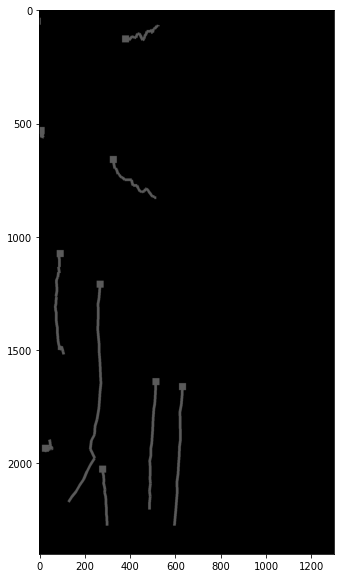

4 0:person, 1: motorcyc, 2: bicycle, 3:truck, 4: car
agent- 1


Model prediction


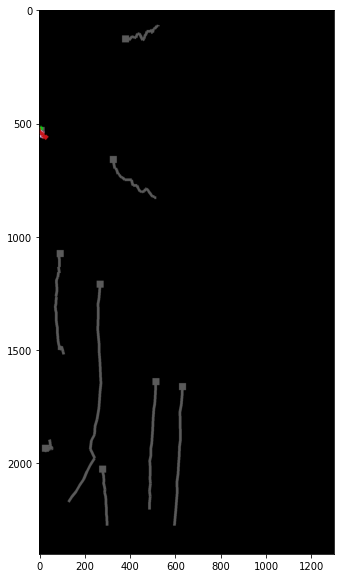

4 0:person, 1: motorcyc, 2: bicycle, 3:truck, 4: car
agent- 2


Model prediction


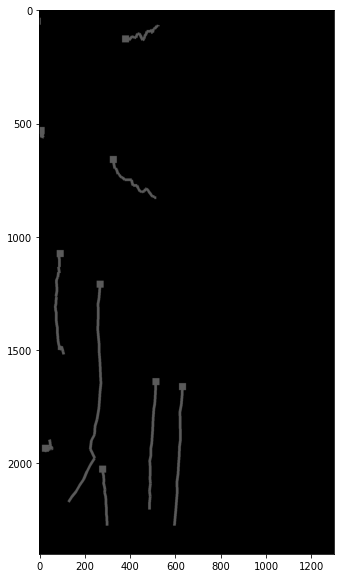

4 0:person, 1: motorcyc, 2: bicycle, 3:truck, 4: car
agent- 3


Model prediction


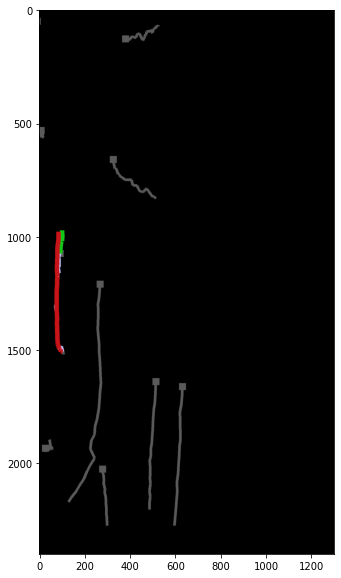

4 0:person, 1: motorcyc, 2: bicycle, 3:truck, 4: car
agent- 4


Model prediction


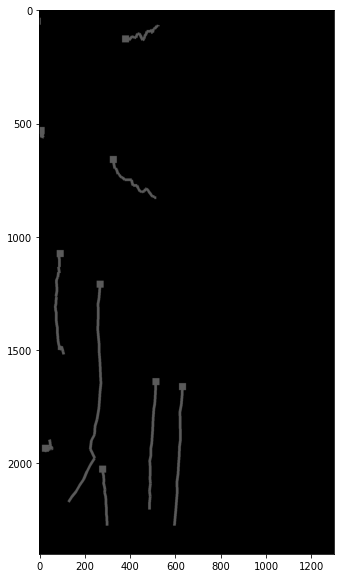

4 0:person, 1: motorcyc, 2: bicycle, 3:truck, 4: car
agent- 5


Model prediction


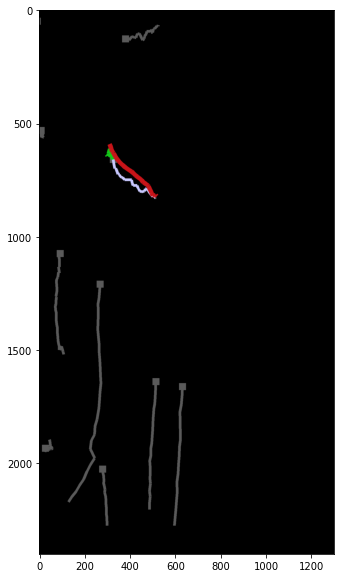

0 0:person, 1: motorcyc, 2: bicycle, 3:truck, 4: car
agent- 6


Model prediction


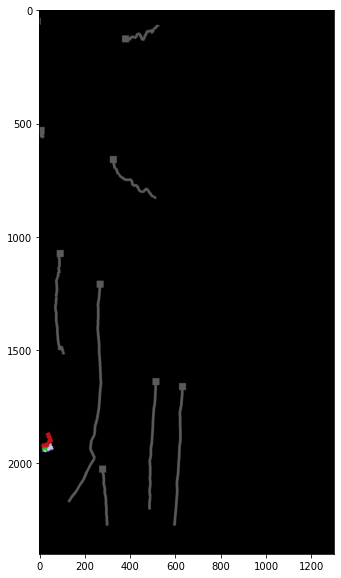

0 0:person, 1: motorcyc, 2: bicycle, 3:truck, 4: car
agent- 7


Model prediction


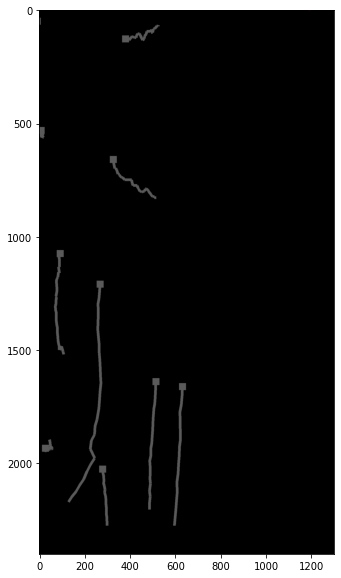

4 0:person, 1: motorcyc, 2: bicycle, 3:truck, 4: car
agent- 8


Model prediction


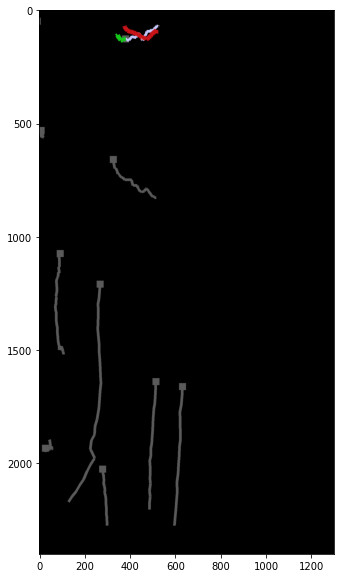

0 0:person, 1: motorcyc, 2: bicycle, 3:truck, 4: car
agent- 9


Model prediction


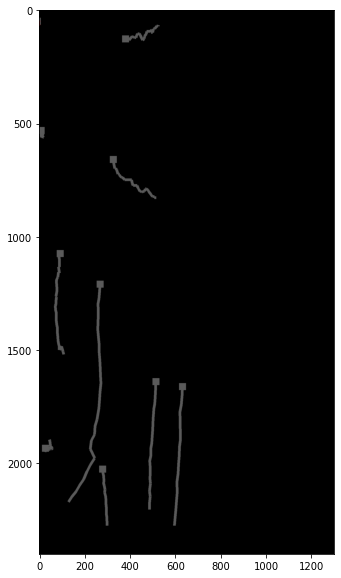

4 0:person, 1: motorcyc, 2: bicycle, 3:truck, 4: car
agent- 10


Model prediction


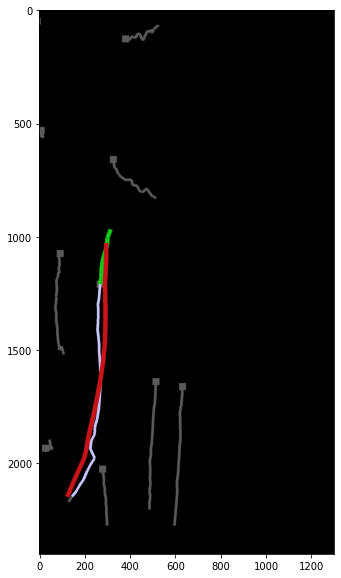

1 0:person, 1: motorcyc, 2: bicycle, 3:truck, 4: car
agent- 11


Model prediction


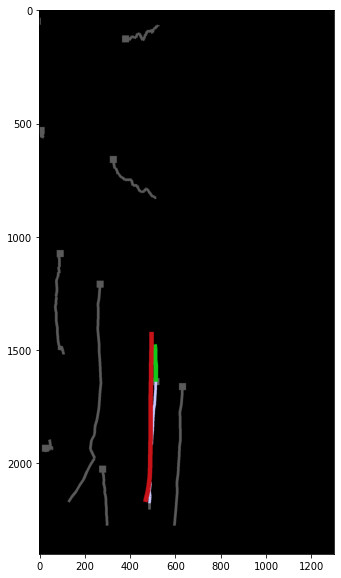

1 0:person, 1: motorcyc, 2: bicycle, 3:truck, 4: car
agent- 12


Model prediction


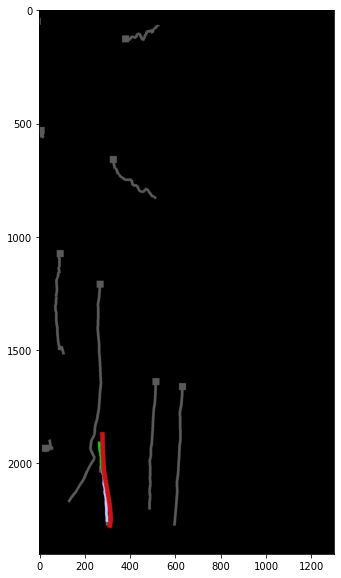

2 0:person, 1: motorcyc, 2: bicycle, 3:truck, 4: car
agent- 13


Model prediction


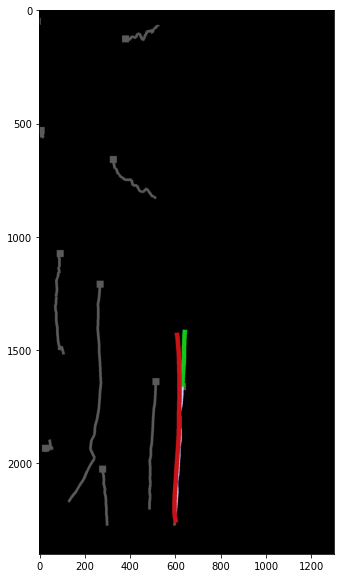

1 0:person, 1: motorcyc, 2: bicycle, 3:truck, 4: car
agent- 14


Model prediction


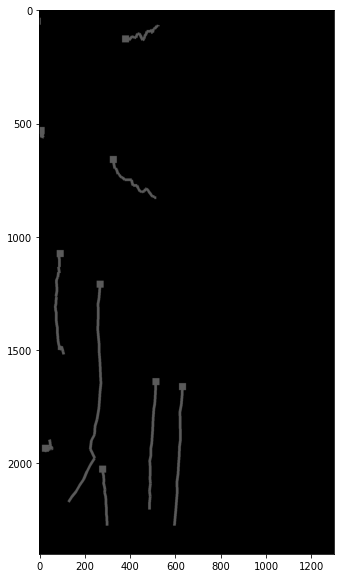

4 0:person, 1: motorcyc, 2: bicycle, 3:truck, 4: car


In [ ]:
for i in range(0, 15):
    print("agent-", i)
    illustrate_scene(450 * 7, i, full = True, wide_view = False, transform = False)

agent- 0


Model prediction


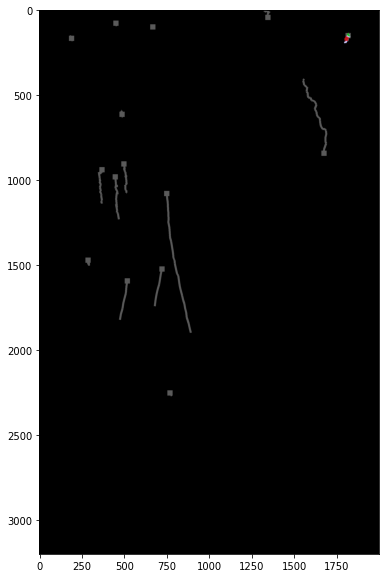

4 0:person, 1: motorcyc, 2: bicycle, 3:truck, 4: car
agent- 1


Model prediction


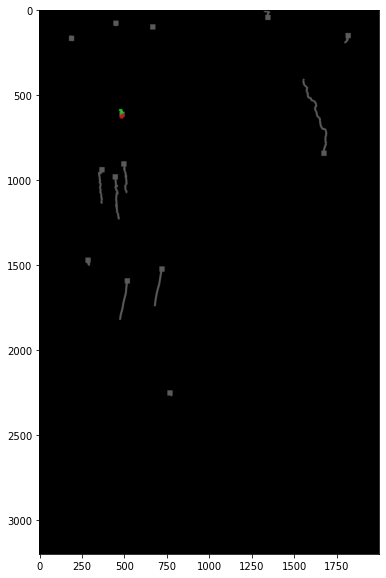

4 0:person, 1: motorcyc, 2: bicycle, 3:truck, 4: car
agent- 2


Model prediction


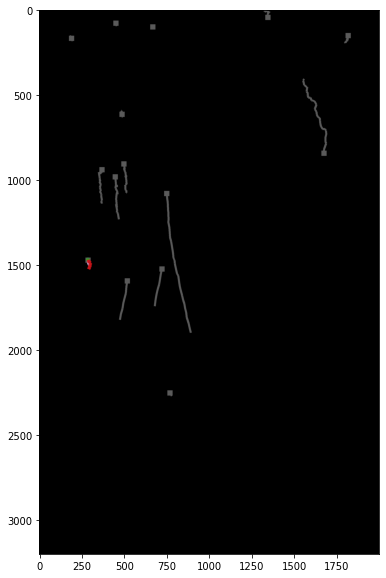

4 0:person, 1: motorcyc, 2: bicycle, 3:truck, 4: car
agent- 3


Model prediction


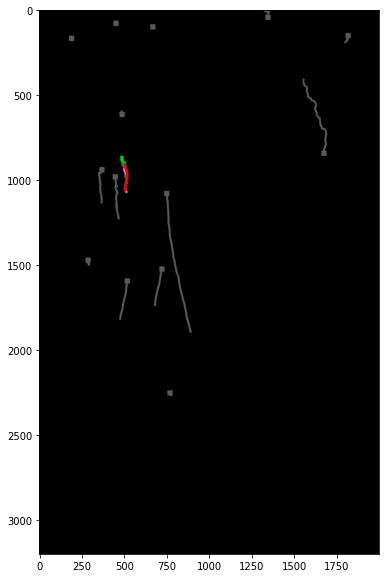

0 0:person, 1: motorcyc, 2: bicycle, 3:truck, 4: car
agent- 4


Model prediction


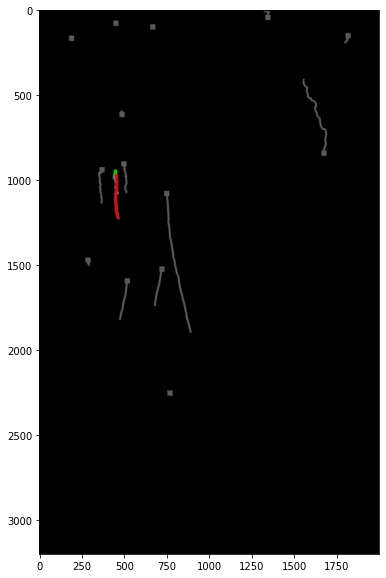

0 0:person, 1: motorcyc, 2: bicycle, 3:truck, 4: car
agent- 5


Model prediction


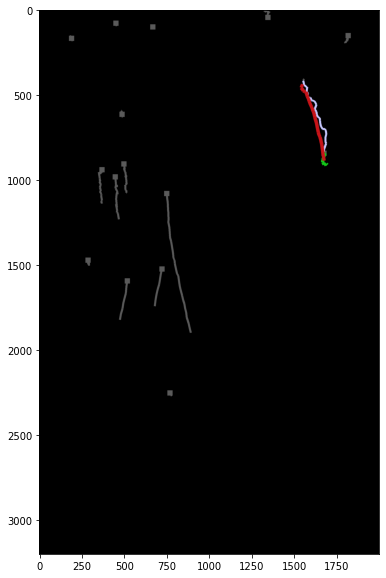

4 0:person, 1: motorcyc, 2: bicycle, 3:truck, 4: car
agent- 6


Model prediction


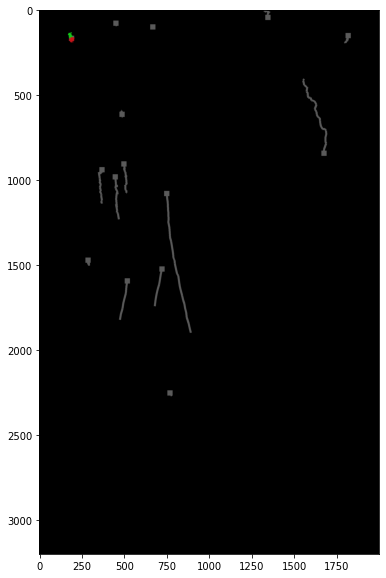

4 0:person, 1: motorcyc, 2: bicycle, 3:truck, 4: car
agent- 7


Model prediction


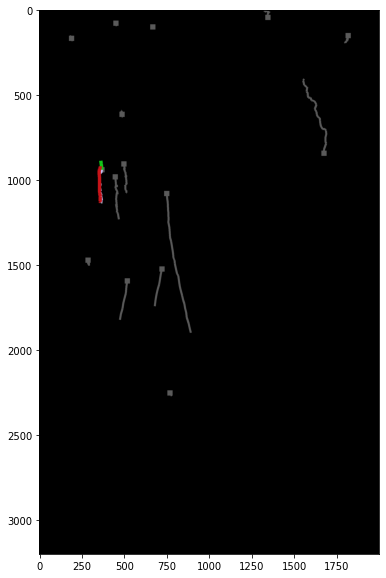

0 0:person, 1: motorcyc, 2: bicycle, 3:truck, 4: car
agent- 8


Model prediction


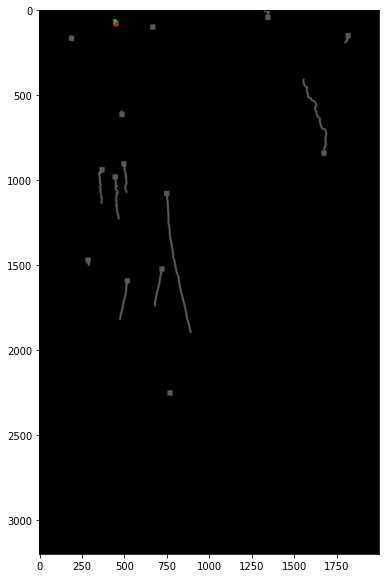

4 0:person, 1: motorcyc, 2: bicycle, 3:truck, 4: car
agent- 9


Model prediction


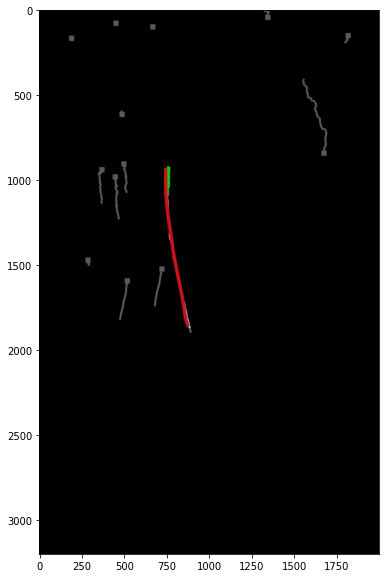

1 0:person, 1: motorcyc, 2: bicycle, 3:truck, 4: car
agent- 10


Model prediction


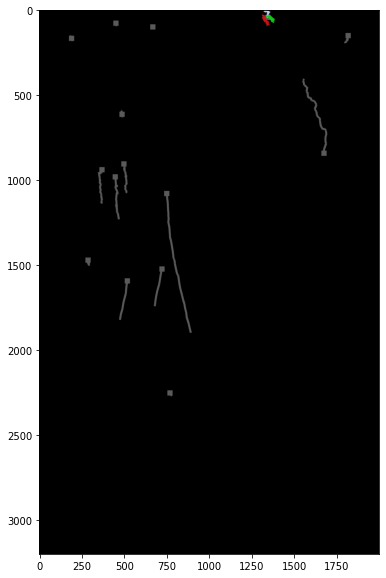

4 0:person, 1: motorcyc, 2: bicycle, 3:truck, 4: car
agent- 11


Model prediction


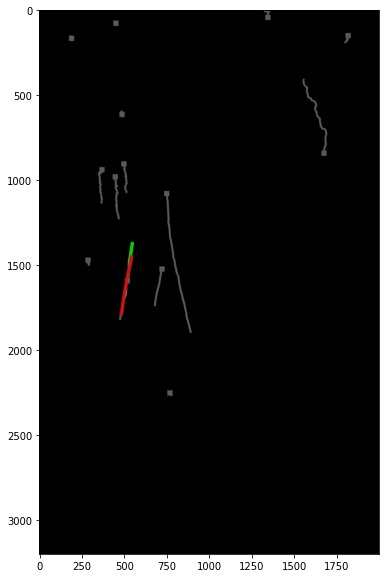

1 0:person, 1: motorcyc, 2: bicycle, 3:truck, 4: car
agent- 12


Model prediction


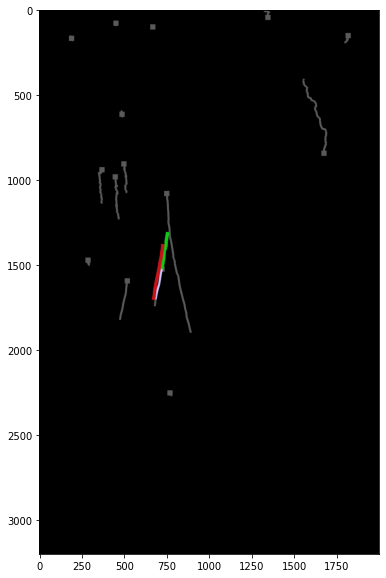

1 0:person, 1: motorcyc, 2: bicycle, 3:truck, 4: car
agent- 13


Model prediction


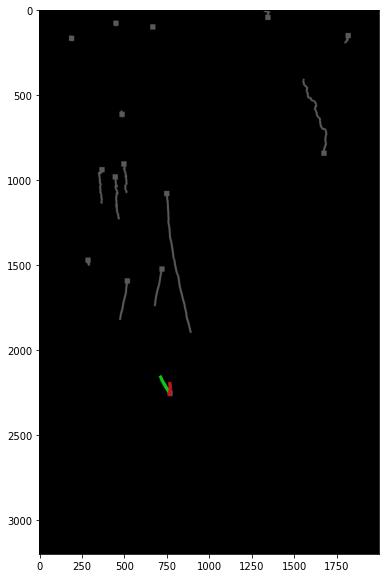

1 0:person, 1: motorcyc, 2: bicycle, 3:truck, 4: car
agent- 14


Model prediction


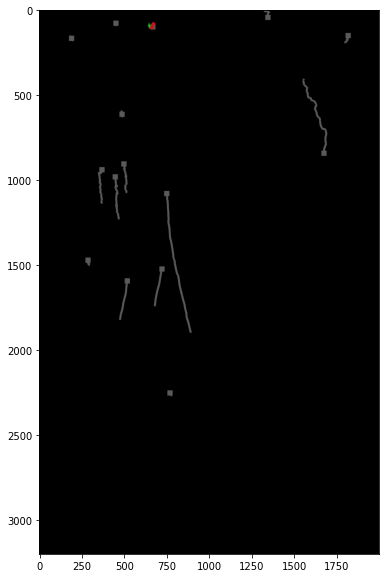

0 0:person, 1: motorcyc, 2: bicycle, 3:truck, 4: car


In [ ]:
for i in range(0, 15):
    print("agent-", i)
    illustrate_scene(300 * 7, i, full = True, wide_view = True, transform = False)

In [ ]:
item_no = 124
agent_id = 7

# dat.set_vertical_transform(True)
a, b, k, d = dat2.getitem(item_no, agent_id)

print("Path being followed ", k)
print(a[:, 5:7])
if isolated:
    temp_a = a.copy()
    temp_a[:, 7:] = -1
    print("\n\nModel prediction")
    out = run_model_on(temp_a)
else:
    print("\n\nModel prediction")
    out = run_model_on(a,0)
    out = out[:, 26:, :]
print(out)

# b = torch.tensor(b[-PREDICT_SIZE:, :].reshape(1, PREDICT_SIZE, 2)).float()
print("\n\nActual Value")
print(b)

Path being followed  26
[[-1.         -1.        ]
 [-1.         -1.        ]
 [-1.         -1.        ]
 [-1.         -1.        ]
 [-1.         -1.        ]
 [-1.         -1.        ]
 [-1.         -1.        ]
 [-1.         -1.        ]
 [-1.         -1.        ]
 [-1.         -1.        ]
 [-1.         -1.        ]
 [-1.         -1.        ]
 [-1.         -1.        ]
 [-1.         -1.        ]
 [-1.         -1.        ]
 [-1.         -1.        ]
 [-1.         -1.        ]
 [-1.         -1.        ]
 [-1.         -1.        ]
 [-1.         -1.        ]
 [-1.         -1.        ]
 [-1.         -1.        ]
 [-1.         -1.        ]
 [-1.         -1.        ]
 [-1.         -1.        ]
 [-1.         -1.        ]
 [ 0.384375    1.53      ]
 [ 0.38125     1.50222222]
 [ 0.379375    1.47444444]
 [ 0.378125    1.44444444]
 [ 0.376875    1.41444444]
 [ 0.375       1.38333333]
 [ 0.373125    1.34444444]
 [ 0.371875    1.30444444]
 [ 0.370625    1.27      ]
 [-1.         -1.        ]
 [-1

## Scene Builder

In [ ]:
# PREDICT_SIZE = 1
# SCENE_SIZE = 40
# INPUT_SIZE = 33
# dat2 = PathDataset3(raw_data, PREDICT_SIZE, SCENE_SIZE)
# isolated = False

In [ ]:
model.cpu()
# model.wo_dc = False

LSTM(
  (agent_encoder_1): Linear(in_features=7, out_features=7, bias=True)
  (agent_encoder_2): Linear(in_features=7, out_features=7, bias=True)
  (encoder_1): Linear(in_features=105, out_features=77, bias=True)
  (encoder_2): Linear(in_features=77, out_features=50, bias=True)
  (lstm): LSTM(50, 50, num_layers=3, batch_first=True)
  (decoder_1): Linear(in_features=50, out_features=26, bias=True)
  (decoder_2): Linear(in_features=26, out_features=2, bias=True)
)

In [ ]:
def simulate_scene(scene, time):
    agents = 0
    dat2.set_vertical_transform(False)
    inputs = []
    outputs = []
    try:
        for idx in range(15):
            a, b, _, _ = dat2.getitem(scene, idx)
            if a[INPUT_SIZE,5]==-1 and a[INPUT_SIZE,6]==-1:
                continue
            agents+=1
            inputs.append(a[:INPUT_SIZE,:])
            outputs.append(a[INPUT_SIZE:,:])
    except:
        pass

    for t in range(time):
        states = []
        for idx in range(agents):
            next_state = -np.ones(105)
            out = run_model_on(inputs[idx])
            next_state[:5] = a[0, :5]
            next_state[5:7] =  out[0, 0, :].detach().numpy()
            # print(a[:, 5:7], next_state)
            states.append(next_state)

        for primary in range(agents):
            i = 0
            for side in range(agents):
                if side is not primary:
                    i+=1
                    states[primary][i*7: i*7+7] = states[side][0:7]
            
            
            inputs[primary] = np.concatenate((inputs[primary][:-PREDICT_SIZE, :], np.reshape(states[primary],(1, -1)), inputs[primary][-PREDICT_SIZE:, :]), 0)
            # print(inputs[primary][:, 5:7])

    
    return np.asarray(inputs), np.asarray(outputs)
            # break
        # break


        
    # for t in range(time):
    #     preds = []
    #     for traj in trajectories:
    #         model.hidden_cell = (torch.zeros(model.num_layers, 1, model.hidden_layer_size),
    #                         torch.zeros(model.num_layers, 1, model.hidden_layer_size))
    #         y_pred = model(torch.tensor(traj).float())
    #         preds.append(y_pred[:, -1, :])
            
    #     for idx, traj in enumerate(trajectories):
            

In [ ]:
def draw_scene(inputs, preds, agents, init_frame, final_frame,  dat = dat2, wide_view = False,):
    
    if wide_view:
      multiplier = (3, 3, 1)
      shift = 1
    else:
      multiplier = (2, 3, 2)
      shift = .5

    img_top = Image.new("RGB", (900*multiplier[0], 1600*multiplier[1]//multiplier[2]))

    pildraw = ImageDraw.Draw(img_top)

    
    for input in inputs:
    # print(a[:, o * 7 + 5 : o * 7 + 7])
    # print('------------------------------------')
        for scene in range(input.shape[0]-1):
            if input[scene, 5] == -1 and input[scene, 6] == -1:
                continue
            if input[scene, 5] == -1 and input[scene, 6] == -1:
                break

            # print((1 - a[k, o * 7 + 5]), ', ', a[k, o*7 + 5])
            pt1 = (int((input[scene, 5] + shift)  * dat.W), int((input[scene, 6] + shift) * dat.H))
            pt2 = (int((input[scene+1, 5] + shift) * dat.W), int((input[scene+1, 6] + shift) * dat.H))
            
            
            pildraw.line(((pt1[0], pt1[1]), (pt2[0], pt2[1])), fill=(90, 90, 90), width = 12)
        
        # print(pts)
        try:
            pildraw.rectangle(((pt2[0]-15, pt2[1]-15), (pt2[0]+15, pt2[1]+15)), fill=(90,90,90), width=1)
        except:
            pass


    init_frame = init_frame + 1

    for fno in range(init_frame, final_frame):
        for a_id in agents:
            try:
              pt2 = dat.agents_in_scene[fno][a_id]
              pt1 = dat.agents_in_scene[fno-1][a_id]

              if dat.up:
                pt1 = pt1[0], dat.H - pt1[1]
              if dat.right : 
                pt1 = dat.W - pt1[0], pt1[1]
              pt1 = pt1[0] + shift * dat.W, pt1[1] + shift * dat.H


              if dat.up:
                pt2 = pt2[0], dat.H - pt2[1]
              if dat.right : 
                pt2 = dat.W - pt2[0], pt2[1]
              pt2 = pt2[0] + shift * dat.W, pt2[1] + shift * dat.H

              pildraw.line(((pt1[0], pt1[1]), (pt2[0], pt2[1])), fill=(20, 200, 25), width = 12)

            except:
              continue
    
    # for output in outputs:
    # # print(a[:, o * 7 + 5 : o * 7 + 7])
    # # print('------------------------------------')
    #     for scene in range(len(output)-1):
    #         if output[scene, 5] == -1 and output[scene, 6] == -1:
    #             continue

    #         if output[scene+1, 5] == -1 and output[scene+1, 6] == -1:
    #               break

    #         # print((1 - a[k, o * 7 + 5]), ', ', a[k, o*7 + 5])
    #         pt1 = (int((output[scene, 5] + shift)  * dat.W), int((output[scene, 6] + shift) * dat.H))
    #         pt2 = (int((output[scene+1, 5] + shift) * dat.W), int((output[scene+1, 6] + shift) * dat.H))
            
    #         # print(pt2)
    #         pildraw.line(((pt1[0], pt1[1]), (pt2[0], pt2[1])), fill=(20, 200, 25), width = 12)

    for pred in preds:
    # print(a[:, o * 7 + 5 : o * 7 + 7])
    # print('------------------------------------')
        for scene in range(len(pred)-1):
            if pred[scene, 5] == -1 and pred[scene, 6] == -1:
                continue
            
            if pred[scene+1, 5] == -1 and pred[scene+1, 6] == -1:
                break

            # print((1 - a[k, o * 7 + 5]), ', ', a[k, o*7 + 5])
            pt1 = (int((pred[scene, 5] + shift)  * dat.W), int((pred[scene, 6] + shift) * dat.H))
            pt2 = (int((pred[scene+1, 5] + shift) * dat.W), int((pred[scene+1, 6] + shift) * dat.H))
            
            
            pildraw.line(((pt1[0], pt1[1]), (pt2[0], pt2[1])), fill=(200, 20, 25), width = 12)

    
    plt.figure(figsize=(24,10))
    # print(np.array(img_top).shape)
    if not wide_view:
      plt.imshow(np.array(img_top)[:,500:])
    else:
      plt.imshow(np.array(img_top)[800:4000,500:2500 ])
    #     cv2.imwrite('trajectory/'+ str(frno).zfill(6) + '.png', np.array(pilimg))
    plt.show()

In [ ]:
preds.shape

In [ ]:
preds, outs = simulate_scene(400*7, SCENE_SIZE-INPUT_SIZE)
inputs, outputs, predictions = preds[:,:INPUT_SIZE, :], outs[:,:, :], preds[:,INPUT_SIZE:, :]
print(inputs.shape, outputs.shape, predictions.shape)
draw_scene(inputs, outputs, predictions)

NameError: ignored

In [ ]:
def simulate_scene2(scene, time = 1, time_steps = 3):
    agents = 0
    dat2.set_vertical_transform(False)
    inputs = []
    outputs = []
    agent_ids = []
    try:
        for idx in range(15):
            a, b, _, agent_id = dat2.getitem(scene, idx)
            # print("orig input",a[:, 5:7])
            if a[-PREDICT_SIZE-1,5]==-1 and a[-PREDICT_SIZE-1,6]==-1:
                continue
            agents+=1
            agent_ids.append(agent_id)
            inputs.append(a)
            
            
    except:
        print("found no of agents")

    print(agents)

    for t in range(time):
        states = []
        # print(t)
        for idx in range(agents):
            next_state = -np.ones((time_steps, 105))
            out = run_model_on(inputs[idx][-SCENE_SIZE:, :])
            # print(out)
            # print("derived input",inputs[idx][-SCENE_SIZE:, 5:7].shape)
            # print("output",out[0, -PREDICT_SIZE:, :])
            next_state[:, :5] = a[:time_steps, :5]
            next_state[:, 5:7] =  out[0, -PREDICT_SIZE:-PREDICT_SIZE+time_steps, :].detach().numpy()
            # print(a[:, 5:7], next_state)
            states.append(next_state)

        for primary in range(agents):
            i = 0
            for side in range(agents):
                if side is not primary:
                    i+=1
                    states[primary][:, i*7: i*7+7] = states[side][:,0:7]
            
            
            inputs[primary] = np.concatenate((inputs[primary][:-PREDICT_SIZE, :], states[primary], inputs[primary][-PREDICT_SIZE:, :]), 0)
            # print(inputs[primary][:, 5:7])

    
    return np.asarray(inputs), np.asarray(outputs), agent_ids
            # break
        # break


        
    # for t in range(time):
    #     preds = []
    #     for traj in trajectories:
    #         model.hidden_cell = (torch.zeros(model.num_layers, 1, model.hidden_layer_size),
    #                         torch.zeros(model.num_layers, 1, model.hidden_layer_size))
    #         y_pred = model(torch.tensor(traj).float())
    #         preds.append(y_pred[:, -1, :])
            
    #     for idx, traj in enumerate(trajectories):
            

In [ ]:
from google.colab import output

15


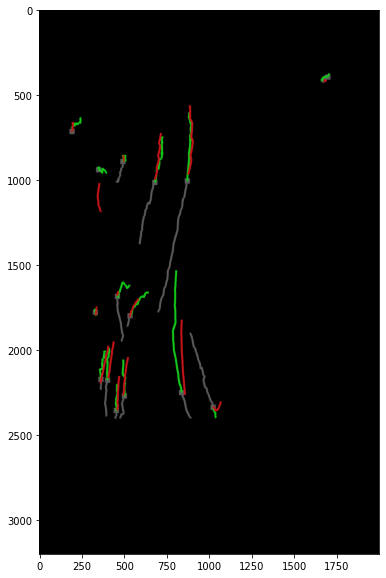

In [ ]:
time = 4
time_steps = 7
intial_scene = 137
multiplier = 7
preds, outs, agents = simulate_scene2(intial_scene*multiplier, time, time_steps) 
init_frame = dat2.get_frame_idx(intial_scene*multiplier) - PREDICT_SIZE
final_frame = init_frame+time*time_steps

draw_scene(preds[:,:SCENE_SIZE-PREDICT_SIZE,:], preds[:,SCENE_SIZE-PREDICT_SIZE:-PREDICT_SIZE,:], agents, init_frame, final_frame, wide_view = True)

15


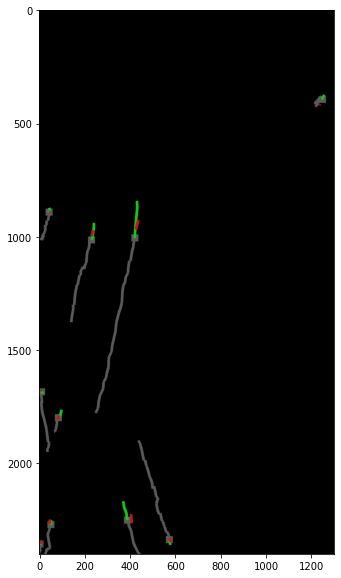

15


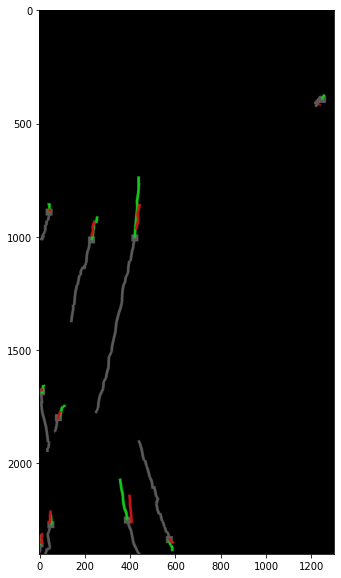

15


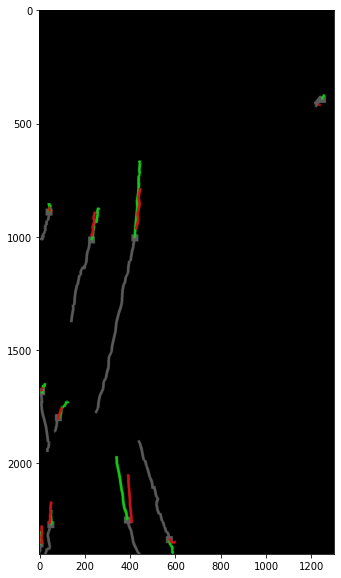

15


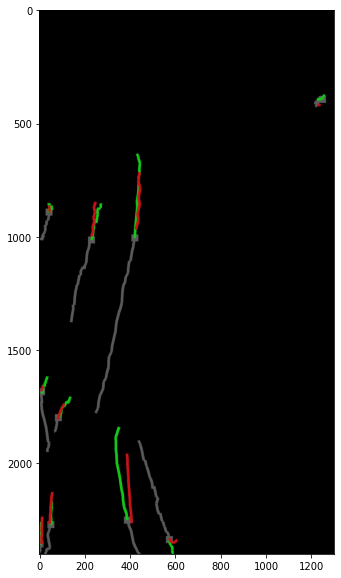

15


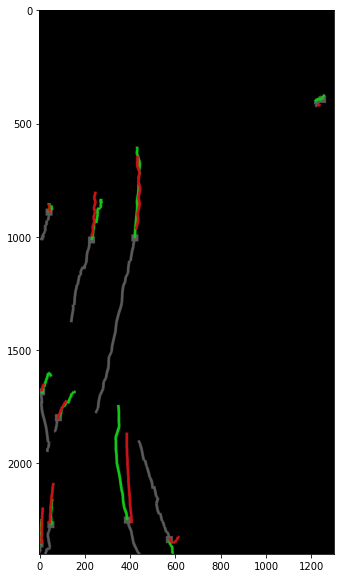

In [ ]:
for i in range(1, 6):    
    time = i
    time_steps = 4
    intial_scene = 137
    multiplier = 7
    preds, outs, agents = simulate_scene2(intial_scene*multiplier, time, time_steps) 
    init_frame = dat2.get_frame_idx(intial_scene*multiplier) - PREDICT_SIZE
    final_frame = init_frame+time*time_steps

    draw_scene(preds[:,:SCENE_SIZE-PREDICT_SIZE,:], preds[:,SCENE_SIZE-PREDICT_SIZE:-PREDICT_SIZE,:], agents, init_frame, final_frame, wide_view = False)
    # output.clear()

15


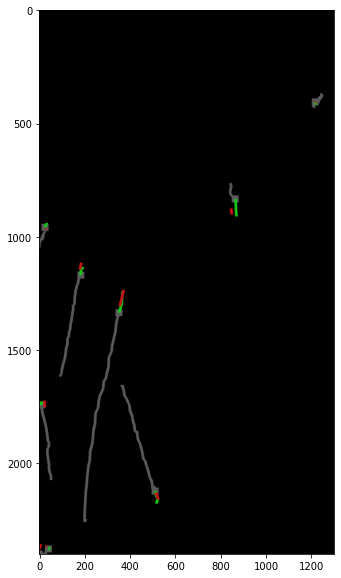

15


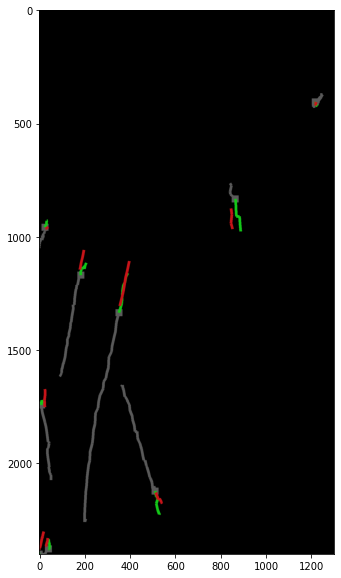

15


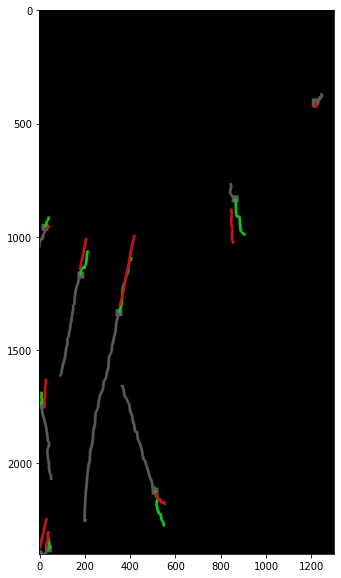

15


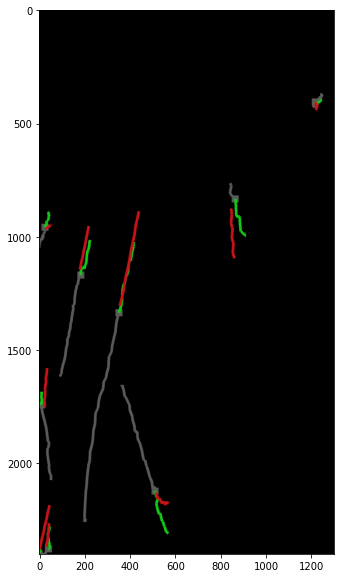

15


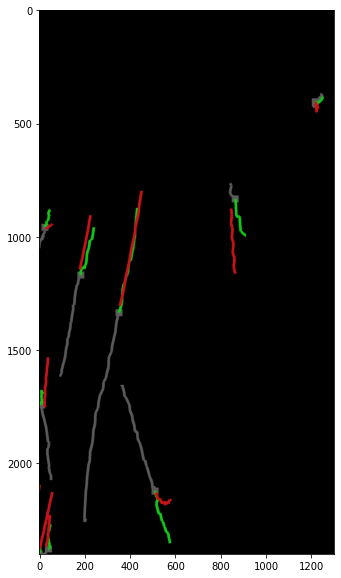

In [ ]:

for i in range(1, 6):    
    time = i
    time_steps = 4
    intial_scene = 120
    multiplier = 7
    preds, outs, agents = simulate_scene2(intial_scene*multiplier, time, time_steps) 
    init_frame = dat2.get_frame_idx(intial_scene*multiplier) - PREDICT_SIZE
    final_frame = init_frame+time*time_steps

    draw_scene(preds[:,:SCENE_SIZE-PREDICT_SIZE,:], preds[:,SCENE_SIZE-PREDICT_SIZE:-PREDICT_SIZE,:], agents, init_frame, final_frame, wide_view = False)
    # output.clear()

found no of agents
14


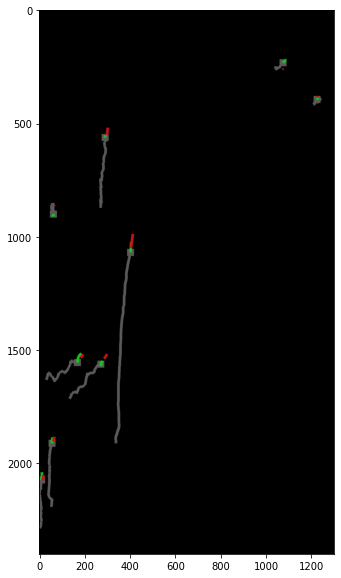

found no of agents
14


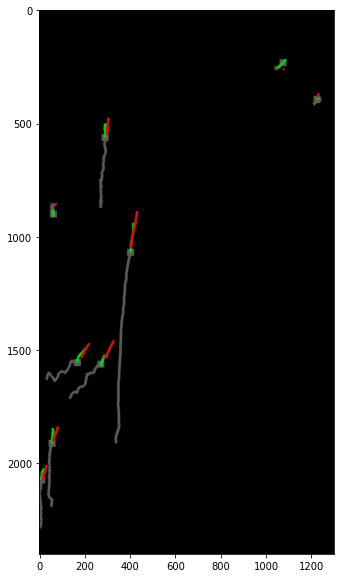

found no of agents
14


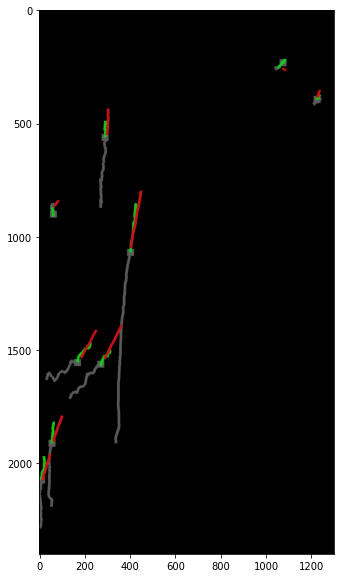

found no of agents
14


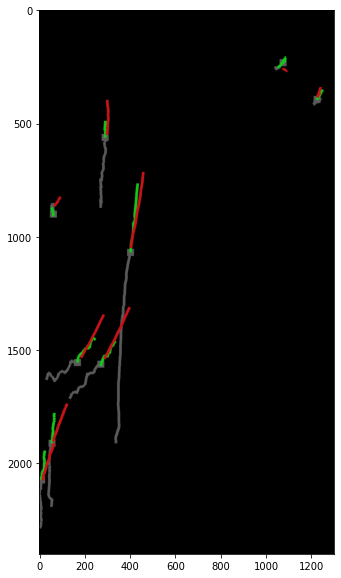

found no of agents
14


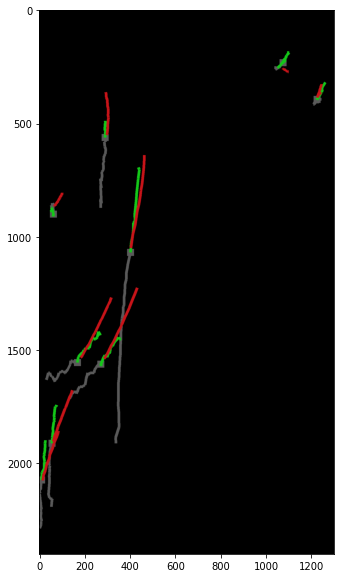

In [ ]:
for i in range(1, 6):    
    time = i
    time_steps = 4
    intial_scene = 182
    multiplier = 7
    preds, outs, agents = simulate_scene2(intial_scene*multiplier, time, time_steps) 
    init_frame = dat2.get_frame_idx(intial_scene*multiplier) - PREDICT_SIZE
    final_frame = init_frame+time*time_steps

    draw_scene(preds[:,:SCENE_SIZE-PREDICT_SIZE,:], preds[:,SCENE_SIZE-PREDICT_SIZE:-PREDICT_SIZE,:], agents, init_frame, final_frame, wide_view = False)
    # output.clear()

15


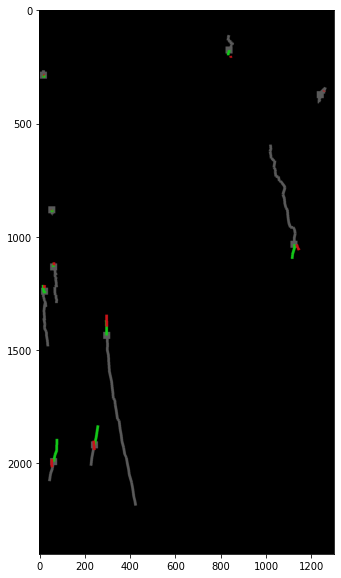

15


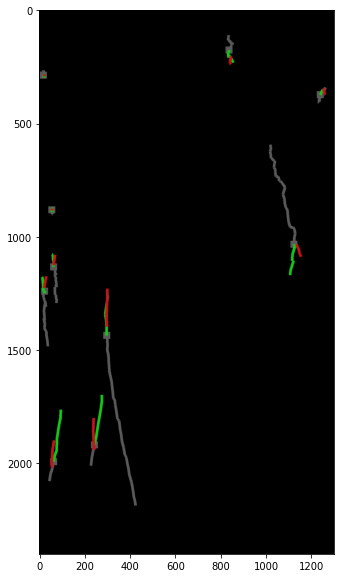

15


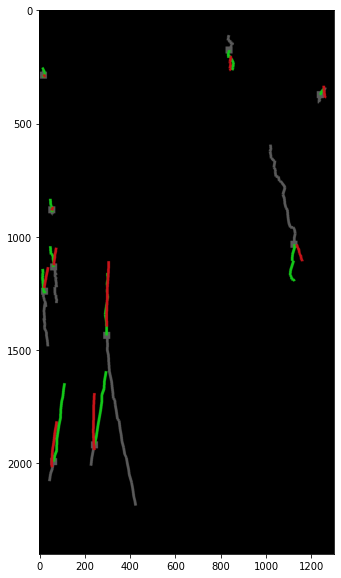

15


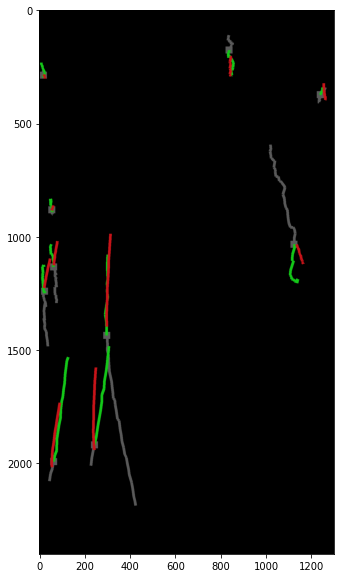

15


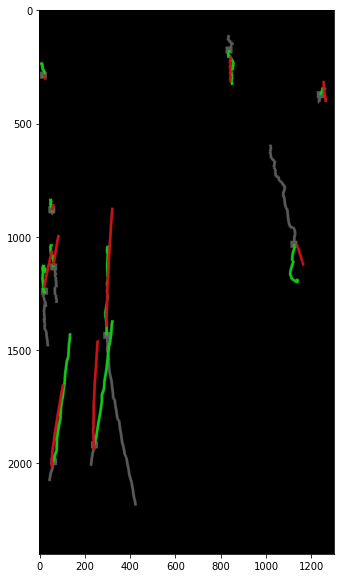

In [ ]:
for i in range(1, 6):    
    time = i
    time_steps = 4
    intial_scene = 298
    multiplier = 7
    preds, outs, agents = simulate_scene2(intial_scene*multiplier, time, time_steps) 
    init_frame = dat2.get_frame_idx(intial_scene*multiplier) - PREDICT_SIZE
    final_frame = init_frame+time*time_steps

    draw_scene(preds[:,:SCENE_SIZE-PREDICT_SIZE,:], preds[:,SCENE_SIZE-PREDICT_SIZE:-PREDICT_SIZE,:], agents, init_frame, final_frame, wide_view = False)
    # output.clear()

15


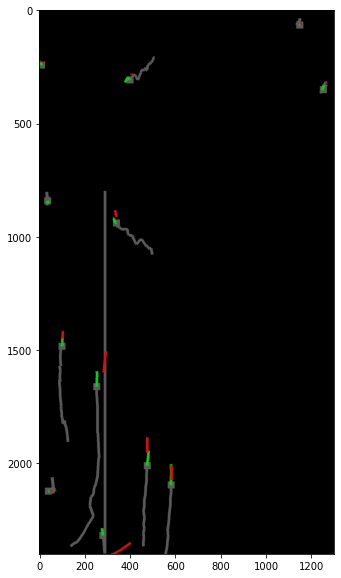

15


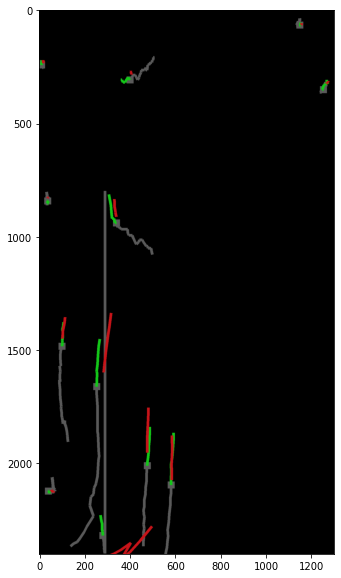

15


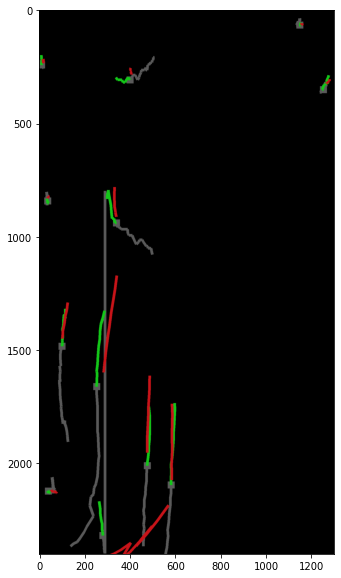

15


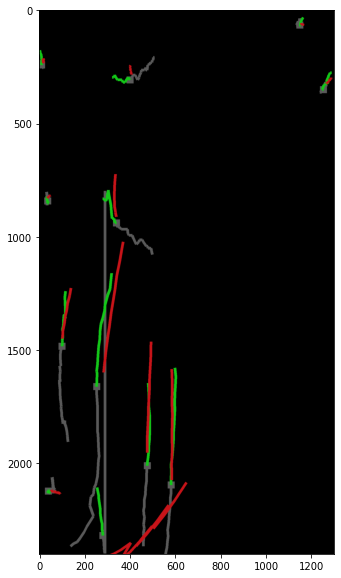

15


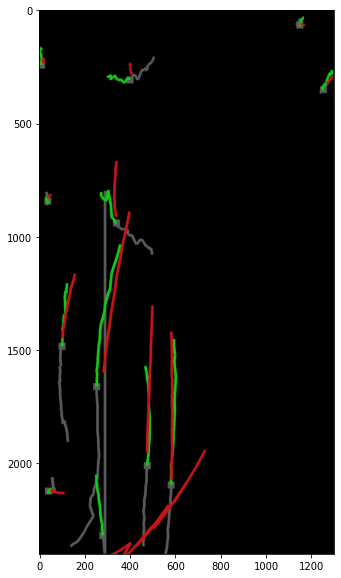

In [ ]:
for i in range(1, 6):    
    time = i
    time_steps = 4
    intial_scene = 446
    multiplier = 7
    preds, outs, agents = simulate_scene2(intial_scene*multiplier, time, time_steps) 
    init_frame = dat2.get_frame_idx(intial_scene*multiplier) - PREDICT_SIZE
    final_frame = init_frame+time*time_steps

    draw_scene(preds[:,:SCENE_SIZE-PREDICT_SIZE,:], preds[:,SCENE_SIZE-PREDICT_SIZE:-PREDICT_SIZE,:], agents, init_frame, final_frame, wide_view = False)
    # output.clear()

15


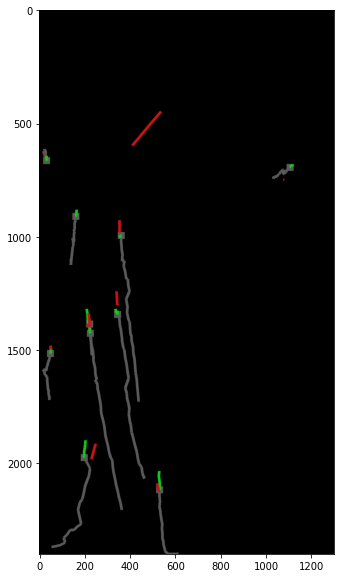

15


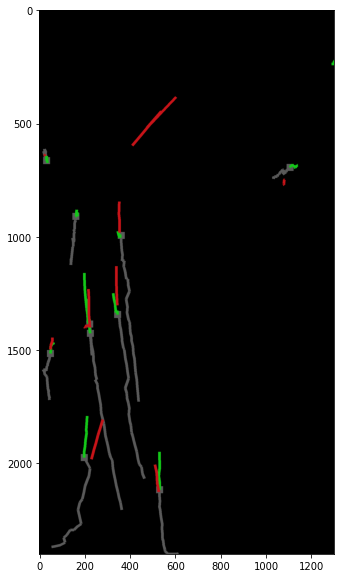

15


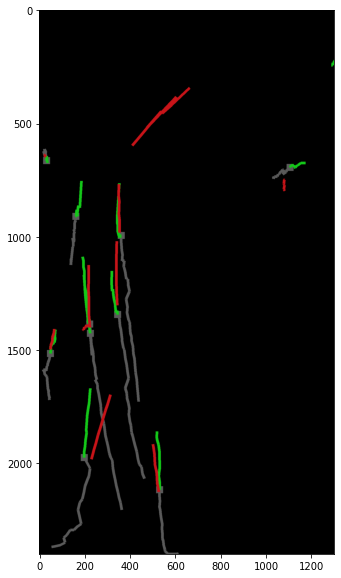

15


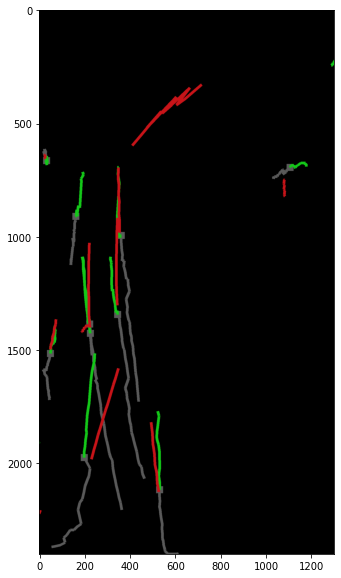

15


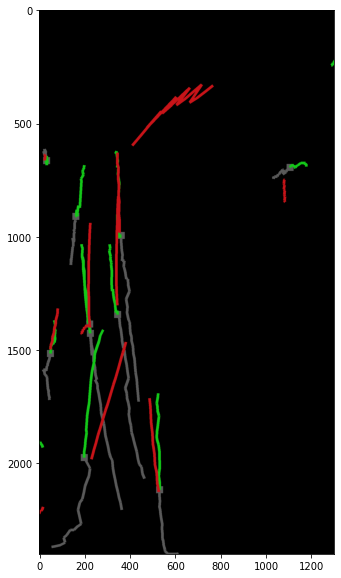

In [ ]:
for i in range(1, 6):    
    time = i
    time_steps = 4
    intial_scene = 563
    multiplier = 7
    preds, outs, agents = simulate_scene2(intial_scene*multiplier, time, time_steps) 
    init_frame = dat2.get_frame_idx(intial_scene*multiplier) - PREDICT_SIZE
    final_frame = init_frame+time*time_steps

    draw_scene(preds[:,:SCENE_SIZE-PREDICT_SIZE,:], preds[:,SCENE_SIZE-PREDICT_SIZE:-PREDICT_SIZE,:], agents, init_frame, final_frame, wide_view = False)
    # output.clear()

# Risk Analysis

## Plotting the weight factor

In [ ]:
import cv2
from PIL import Image, ImageDraw
import matplotlib.pyplot as plt

In [ ]:
dat2 = PathDataset3(raw_data, PREDICT_SIZE, SCENE_SIZE)

In [ ]:
def get_r(x, y, a, b):
  r = ((a-x)**2 + (b - y) ** 2) ** .5
  return r

In [ ]:
def get_theta(x1, y1, x2, y2, a, b, cos = False, isRadial = True):
  if isRadial:
    if cos:
      return 1
    else:
      return 0

  A = [x2 - x1, y2 - y1]
  B = [a - x2, b - y2]
  
  Acap = A / np.linalg.norm(A)
  Bcap = B / np.linalg.norm(B)
  dot_product = np.dot(Acap, Bcap)
  if cos:
    return dot_product
    
  return np.arccos(dot_product)

In [ ]:
def get_weight(d, cos_theta, Wmax = 255, sigma = 200):
  return Wmax * np.exp(- (d/sigma)**2 ) * ((1 + cos_theta) / 2)

In [ ]:
def get_sigma_for_agent(agentType):
  distance_to_pixel_factor = 900/8
  if agentType == 1:    # Person
    return .5 * distance_to_pixel_factor
  elif agentType == 2:  # Motorcycle
    return .8 * distance_to_pixel_factor
  elif agentType == 3:  # Cycle
    return .7 * distance_to_pixel_factor
  elif agentType == 4:  # Truck
    return 1.5 * distance_to_pixel_factor
  else:                 # Car
    return 1.3 * distance_to_pixel_factor

In [ ]:
def get_agent_width(agentType):
  distance_to_pixel_factor = 900/8
  if agentType == 1:    # Person
    return .1 * distance_to_pixel_factor
  elif agentType == 2:  # Motorcycle
    return .8 * distance_to_pixel_factor
  elif agentType == 3:  # Cycle
    return .7 * distance_to_pixel_factor
  elif agentType == 4:  # Truck
    return 4 * distance_to_pixel_factor
  else:                 # Car
    return 2 * distance_to_pixel_factor

In [ ]:
def illustrate_scene_analysis(item_no, agent_idx, dat = dat2, full = False, wide_view = False, transform = False, plot_weights = True):
    ## Prevents vertical transform so that viewing images is
    ## not an issue
    dat.set_vertical_transform(transform)
    normal_mode = True
    try:
      a, b, k = dat.getitem(item_no, agent_idx)
    except:
      normal_mode = False
      a,b, k, agent_id = dat.getitem(item_no, agent_idx)

    b = b[-PREDICT_SIZE:,:]
  
    a = a[k:, :]
    
    ln = a.shape[0]

    b = torch.tensor(b.reshape(1, PREDICT_SIZE, 2)).float()

    frame_count = dat.get_frame_idx(item_no)

    color = list(np.random.choice(range(256), size=10))

    if wide_view:
      multiplier = (3, 3, 1)
      shift = 1
    else:
      multiplier = (2, 3, 2)
      shift = .5

    img_top = Image.new("RGB", (900*multiplier[0], 1600*multiplier[1]//multiplier[2]))
    pildraw = ImageDraw.Draw(img_top)

    if normal_mode:
      for o in range(1, 14):
      # print(a[:, o * 7 + 5 : o * 7 + 7])
      # print('------------------------------------')
          for k in range(ln - PREDICT_SIZE - 1, 1, -1):
              if a[k-1, o * 7 + 5] == -1:
                  continue
              if a[k, o * 7 + 5] == -1:
                  break
              # print((1 - a[k, o * 7 + 5]), ', ', a[k, o*7 + 5])
              pt1 = (int((a[k-1, o * 7 + 5] + shift)  * dat.W), int((a[k-1, o * 7 + 6] + shift) * dat.H))
              pt2 = (int((a[k, o * 7 + 5] + shift) * dat.W), int((a[k, o * 7 + 6] + shift) * dat.H))
              
              
              pildraw.line(((pt1[0], pt1[1]), (pt2[0], pt2[1])), fill=(90, 90, 90), width = 12)
          pts = (a[-PREDICT_SIZE - 1, o * 7 + 5] + shift) * dat.W, (a[-PREDICT_SIZE - 1, o * 7 + 6] + shift) * dat.H 
          # print(pts)
          pildraw.rectangle(((pts[0]-15, pts[1]-15), (pts[0]+15, pts[1]+15)), fill=(90,90,90), width=1)


    else:
        scene_no = dat.get_frame_idx(item_no)
        agents = list(dat.agents_in_scene[scene_no].keys())
        for j, agent in enumerate(agents):
          if j == agent_id:
            continue
          
          end_frame = max(dat.raw_data[agent]['start'] - 1, scene_no - dat.scenes)
          lim_frame = scene_no - dat.predict

          if lim_frame > end_frame:
            pts = dat.agents_in_scene[lim_frame][agent]

            if agent in dat.agents_in_scene[lim_frame - 1].keys():
              if agent in dat.agents_in_scene[lim_frame - 2].keys():
                a1 = dat.agents_in_scene[lim_frame-1][agent]
                b1 = dat.agents_in_scene[lim_frame-2][agent]
                b1 = (pts[0] + b1[0])/2, (pts[1] + b1[1])/2
                lastPts = (a1[0] + b1[0])/2, (a1[1] + b1[1])/2

              else:
                lastPts = dat.agents_in_scene[lim_frame-1][agent]
            else:
              lastPts = pts

            isRadial = False
            if lastPts[0] == pts[0] and lastPts[1] == pts[1]:
              isRadial = True
            
            if dat.up:
              pts = pts[0], dat.H - pts[1]
              lastPts = lastPts[0], dat.H - lastPts[1]
            if dat.right : 
              pts = dat.W - pts[0], pts[1]
              lastPts = dat.W - lastPts[0], lastPts[1]

            pts = int(pts[0] + shift * dat.W), int(pts[1] + shift * dat.H)
            lastPts = int(lastPts[0] + shift * dat.W), int(lastPts[1] + shift * dat.H)

            pildraw.rectangle(((pts[0]-15, pts[1]-15), (pts[0]+15, pts[1]+15)), fill=(90,90,90), width=1) 

            agentType = dat.raw_data[agent]['type']
            sigma = get_sigma_for_agent(agentType)
            radiusZone = int(sigma / .8)

            if plot_weights:
              for dx in range(pts[0] - radiusZone, pts[0] + radiusZone):
                for dy in range(pts[1] - radiusZone, pts[1] + radiusZone):

                  d = max(get_r(*pts, dx, dy) - (get_agent_width(agentType)), 0.01)
                  theta = get_theta(*lastPts, *pts, dx, dy, True, isRadial = isRadial)

                  try:
                    w = int(get_weight(d, theta, sigma = sigma))
                  except:
                    w = 128

                  if img_top.getpixel((dx, dy)) == (0, 0, 0):
                    pildraw.rectangle(((dx-1, dy-1), (dx+1, dy+1)), fill=(w, w, w), width=1)
                  
          for scene in range(lim_frame, end_frame, -1):
            if scene == end_frame + 1:
              continue

            pt1 = dat.agents_in_scene[scene-1][agent]
            if dat.up:
              pt1 = pt1[0], dat.H - pt1[1]
            if dat.right : 
              pt1 = dat.W - pt1[0], pt1[1]
            pt1 = pt1[0] + shift * dat.W, pt1[1] + shift * dat.H



            pt2 = dat.agents_in_scene[scene][agent]
            if dat.up:
              pt2 = pt2[0], dat.H - pt2[1]
            if dat.right : 
              pt2 = dat.W - pt2[0], pt2[1]
            pt2 = pt2[0] + shift * dat.W, pt2[1] + shift * dat.H
        
            pildraw.line(((pt1[0], pt1[1]), (pt2[0], pt2[1])), fill=(90, 90, 90), width = 12)
        
          

    for k in range(a.shape[0] - PREDICT_SIZE - 1, 1, -1):
        if a[k-1, 5] == -1:
            continue
        if a[k,  5] == -1:
            break

        pt1 = (int((a[k-1,  5] + shift) * dat.W), int((a[k-1, 6] + shift) * dat.H))
        pt2 = (int((a[k, 5] + shift) * dat.W), int((a[k, 6] + shift) * dat.H))    
        
        pildraw.line(((pt1[0], pt1[1]), (pt2[0], pt2[1])), fill=(200, 200, 255), width = 12)

    for i, coord in enumerate(b[0]):
        if i == 0:
          pt1 = (a[- PREDICT_SIZE - 1 , 5] + shift) * dat.W, (a[-PREDICT_SIZE - 1,6] + shift) * dat.H
        else:
          pt1 = (int((b[0, i-1, 0] + shift) * dat.W), int((b[0, i-1, 1] + shift) * dat.H))
        
        pt2 = (int((b[0, i, 0] + shift) * dat.W), int((b[0, i, 1] + shift) * dat.H))    
        
        pildraw.line(((pt1[0], pt1[1]), (pt2[0], pt2[1])), fill=(20, 200, 25), width = 20)



    plt.figure(figsize=(24,10))
    # print(np.array(img_top).shape)
    if not wide_view:
      plt.imshow(np.array(img_top)[:,500:])
    else:
      plt.imshow(np.array(img_top)[800:4000,500:2500])
    #     cv2.imwrite('trajectory/'+ str(frno).zfill(6) + '.png', np.array(pilimg))
    plt.show()
    clss =  np.argmax(a[0, 0: 5]) 
    print(clss, "0:person, 1: motorcyc, 2: bicycle, 3:truck, 4: car")  

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in true_divide
  if sys.path[0] == '':


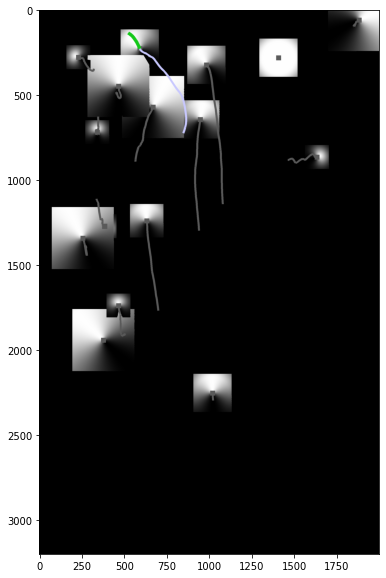

1 0:person, 1: motorcyc, 2: bicycle, 3:truck, 4: car


In [ ]:
scene_no = 499
agent_no = 5

# illustrate_scene_analysis(scene_no * 7, agent_no, wide_view= True, plot_weights = False)
illustrate_scene_analysis(scene_no * 7, agent_no, wide_view= True, plot_weights = True)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in true_divide
  if sys.path[0] == '':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in true_divide
  # This is added back by InteractiveShellApp.init_path()


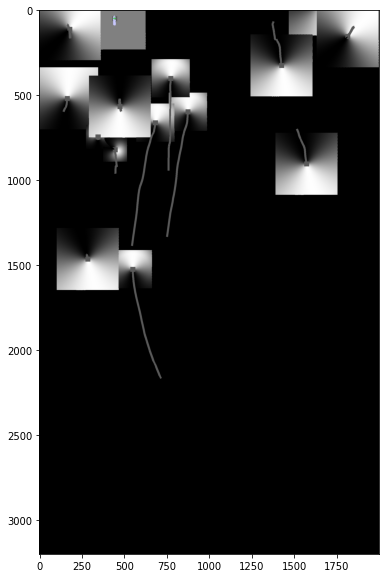

4 0:person, 1: motorcyc, 2: bicycle, 3:truck, 4: car


In [ ]:
scene_no = 340
agent_no = 5

# illustrate_scene_analysis(scene_no * 7, agent_no, wide_view= True, plot_weights = False)
illustrate_scene_analysis(scene_no * 7, agent_no, wide_view= True, plot_weights = True)

## Zebra Crossing Wala

In [ ]:
def situation_wise_scene_analysis(item_no, agent_idx, dat = dat2, full = False, wide_view = False, transform = False, plot_weights = True):
    ## Prevents vertical transform so that viewing images is
    ## not an issue
    dat.set_vertical_transform(transform)
    normal_mode = True
    try:
      a, b, k = dat.getitem(item_no, agent_idx)
    except:
      normal_mode = False
      a,b, k, agent_id = dat.getitem(item_no, agent_idx)

    b = b[-PREDICT_SIZE:,:]
  
    a = a[k:, :]
    
    ln = a.shape[0]

    b = torch.tensor(b.reshape(1, PREDICT_SIZE, 2)).float()

    frame_count = dat.get_frame_idx(item_no)

    color = list(np.random.choice(range(256), size=10))

    if wide_view:
      multiplier = (3, 3, 1)
      shift = 1
    else:
      multiplier = (2, 3, 2)
      shift = .5

    img_top = Image.new("RGB", (900*multiplier[0], 1600*multiplier[1]//multiplier[2]))
    pildraw = ImageDraw.Draw(img_top)

    if normal_mode:
      for o in range(1, 14):
      # print(a[:, o * 7 + 5 : o * 7 + 7])
      # print('------------------------------------')
          for k in range(ln - PREDICT_SIZE - 1, 1, -1):
              if a[k-1, o * 7 + 5] == -1:
                  continue
              if a[k, o * 7 + 5] == -1:
                  break
              # print((1 - a[k, o * 7 + 5]), ', ', a[k, o*7 + 5])
              pt1 = (int((a[k-1, o * 7 + 5] + shift)  * dat.W), int((a[k-1, o * 7 + 6] + shift) * dat.H))
              pt2 = (int((a[k, o * 7 + 5] + shift) * dat.W), int((a[k, o * 7 + 6] + shift) * dat.H))
              
              
              pildraw.line(((pt1[0], pt1[1]), (pt2[0], pt2[1])), fill=(90, 90, 90), width = 12)
          pts = (a[-PREDICT_SIZE - 1, o * 7 + 5] + shift) * dat.W, (a[-PREDICT_SIZE - 1, o * 7 + 6] + shift) * dat.H 
          # print(pts)
          pildraw.rectangle(((pts[0]-15, pts[1]-15), (pts[0]+15, pts[1]+15)), fill=(90,90,90), width=1)


    else:
        scene_no = dat.get_frame_idx(item_no)
        agents = list(dat.agents_in_scene[scene_no].keys())


        humans_list = []
        other_list = []

        prev_path = {}
        prev_path[agent_id] = []
        agentType = dat.raw_data[agent_id]['type']
        if agentType == 1:
          humans_list.append(agent_id)
        else:
          other_list.append(agent_id)
            

        
        for j, agent in enumerate(agents):
          if j == agent_id:
            continue
          
          end_frame = max(dat.raw_data[agent]['start'] - 1, scene_no - dat.scenes)
          lim_frame = scene_no - dat.predict

          if lim_frame > end_frame:
            pts = dat.agents_in_scene[lim_frame][agent]
            
            if dat.up:
              pts = pts[0], dat.H - pts[1]
            if dat.right : 
              pts = dat.W - pts[0], pts[1]

            pts = int(pts[0] + shift * dat.W), int(pts[1] + shift * dat.H)
            pildraw.rectangle(((pts[0]-15, pts[1]-15), (pts[0]+15, pts[1]+15)), fill=(90,90,90), width=1)
            agentType = dat.raw_data[agent]['type']
            if agentType == 1:
              humans_list.append(agent)
            else:
              other_list.append(agent)
            
            prev_path[agent] = [pts]
                  
          for scene in range(lim_frame, end_frame, -1):
            if scene == end_frame + 1:
              continue

            pt1 = dat.agents_in_scene[scene-1][agent]
            if dat.up:
              pt1 = pt1[0], dat.H - pt1[1]
            if dat.right : 
              pt1 = dat.W - pt1[0], pt1[1]
            pt1 = pt1[0] + shift * dat.W, pt1[1] + shift * dat.H

            prev_path[agent].append(pt1)

            pt2 = dat.agents_in_scene[scene][agent]
            if dat.up:
              pt2 = pt2[0], dat.H - pt2[1]
            if dat.right : 
              pt2 = dat.W - pt2[0], pt2[1]
            pt2 = pt2[0] + shift * dat.W, pt2[1] + shift * dat.H
        
            pildraw.line(((pt1[0], pt1[1]), (pt2[0], pt2[1])), fill=(90, 90, 90), width = 12)
        
          
    
    for k in range(a.shape[0] - PREDICT_SIZE - 1, 1, -1):
        if a[k-1, 5] == -1:
            continue
        if a[k,  5] == -1:
            break

        pt1 = (int((a[k-1,  5] + shift) * dat.W), int((a[k-1, 6] + shift) * dat.H))
        pt2 = (int((a[k, 5] + shift) * dat.W), int((a[k, 6] + shift) * dat.H))    

        prev_path[agent_id].append(pt2)

        pildraw.line(((pt1[0], pt1[1]), (pt2[0], pt2[1])), fill=(200, 200, 255), width = 12)

    for i, coord in enumerate(b[0]):
        if i == 0:
          pt1 = (a[- PREDICT_SIZE - 1 , 5] + shift) * dat.W, (a[-PREDICT_SIZE - 1,6] + shift) * dat.H
        else:
          pt1 = (int((b[0, i-1, 0] + shift) * dat.W), int((b[0, i-1, 1] + shift) * dat.H))
        
        pt2 = (int((b[0, i, 0] + shift) * dat.W), int((b[0, i, 1] + shift) * dat.H))    
        
        pildraw.line(((pt1[0], pt1[1]), (pt2[0], pt2[1])), fill=(20, 200, 25), width = 20)




    last_sign = {}
    sign = {}

    frame = 0

    for h in humans_list:
      h_x, h_y = prev_path[h][0]
      for o in other_list:
          o_x, o_y = prev_path[o][0]

          side = 1 if h_y > o_y else -1

          sign[str(h) + ',' + str(o)] = side 
          last_sign[str(h) + ',' + str(o)] = side

    frame = frame + 1

    for l in range(10):
      for h in humans_list:
        
        if frame >= len(prev_path[h]):
          continue

        h_x, h_y = prev_path[h][frame]

        for o in other_list:
            if frame >= len(prev_path[o]):
              continue

            o_x, o_y = prev_path[o][frame]

            side = 1 if h_y > o_y else -1
            sign[str(h) + ',' + str(o)] = side 
      
      for id, side in sign.items():
        if side == last_sign[id]:
          continue
        
        else:
          h, o = [int(x) for x in id.split(',')]
          last_sign[id] = side


          
          h_x, h_y = prev_path[h][frame]
          o_x, o_y = prev_path[o][frame]

          h_x, h_y = int(h_x), int(h_y)
          o_x, o_y = int(o_x), int(o_y)

          if abs(h_x - o_x) < 300:
            pildraw.line(((h_x, h_y), (o_x, o_y)), fill=(200, 20, 25), width = 20)
          elif abs(h_x - o_x) < 600:
            pildraw.line(((h_x, h_y), (o_x, o_y)), fill=(20, 200, 200), width = 20)
      
      frame = frame + 1

    plt.figure(figsize=(24,10))
    # print(np.array(img_top).shape)
    if not wide_view:
      plt.imshow(np.array(img_top)[:,500:])
    else:
      plt.imshow(np.array(img_top)[800:4000,500:2500])
    #     cv2.imwrite('trajectory/'+ str(frno).zfill(6) + '.png', np.array(pilimg))
    plt.show()
    clss =  np.argmax(a[0, 0: 5]) 
    print(clss, "0:person, 1: motorcyc, 2: bicycle, 3:truck, 4: car")  

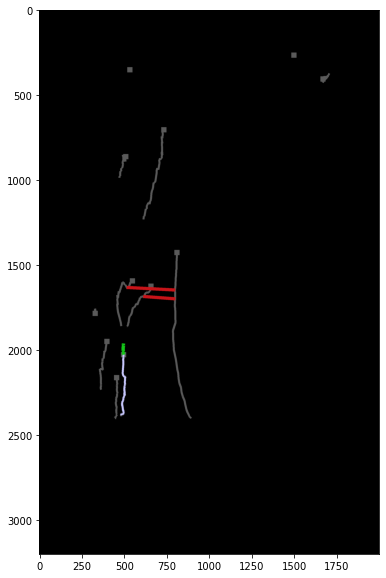

0 0:person, 1: motorcyc, 2: bicycle, 3:truck, 4: car


In [ ]:
# 168, 150, 
situation_wise_scene_analysis(168*7, 5, wide_view = True)

In [ ]:
def get_agent_width(agentType):
  distance_to_pixel_factor = 900/8
  if agentType == 1:    # Person
    return .1 * distance_to_pixel_factor
  elif agentType == 2:  # Motorcycle
    return .6 * distance_to_pixel_factor
  elif agentType == 3:  # Cycle
    return .5 * distance_to_pixel_factor
  elif agentType == 4:  # Truck
    return 4 * distance_to_pixel_factor
  else:                 # Car
    return 1.5 * distance_to_pixel_factor

In [ ]:
rating = {}

In [ ]:
def situation_wise_risk_computation(item_no, dat = dat2):
    ## Prevents vertical transform so that viewing images is
    ## not an issue
    dat.set_vertical_transform(False)
    normal_mode = True
    try:
      a, b, k = dat.getitem(item_no, 1)
    except:
      normal_mode = False
      a,b, k, agent_id = dat.getitem(item_no, 1)

    frame_count = dat.get_frame_idx(item_no)


  
    multiplier = (2, 3, 2)
    shift = .5

    if normal_mode:
      for o in range(1, 14):
      # print(a[:, o * 7 + 5 : o * 7 + 7])
      # print('------------------------------------')
          for k in range(ln - PREDICT_SIZE - 1, 1, -1):
              if a[k-1, o * 7 + 5] == -1:
                  continue
              if a[k, o * 7 + 5] == -1:
                  break
              # print((1 - a[k, o * 7 + 5]), ', ', a[k, o*7 + 5])
              pt1 = (int((a[k-1, o * 7 + 5] + shift)  * dat.W), int((a[k-1, o * 7 + 6] + shift) * dat.H))
              pt2 = (int((a[k, o * 7 + 5] + shift) * dat.W), int((a[k, o * 7 + 6] + shift) * dat.H))
              
              
              pildraw.line(((pt1[0], pt1[1]), (pt2[0], pt2[1])), fill=(90, 90, 90), width = 12)
          pts = (a[-PREDICT_SIZE - 1, o * 7 + 5] + shift) * dat.W, (a[-PREDICT_SIZE - 1, o * 7 + 6] + shift) * dat.H 
          # print(pts)
          pildraw.rectangle(((pts[0]-15, pts[1]-15), (pts[0]+15, pts[1]+15)), fill=(90,90,90), width=1)


    else:
        scene_no = dat.get_frame_idx(item_no)
        agents = list(dat.agents_in_scene[scene_no].keys())


        humans_list = []
        other_list = []

        prev_path = {}
        prev_path[agent_id] = []
        agentType = dat.raw_data[agent_id]['type']
        if agentType == 1:
          humans_list.append(agent_id)
        else:
          other_list.append(agent_id)
            

        
        for j, agent in enumerate(agents):
          if j == agent_id:
            continue
          
          end_frame = max(dat.raw_data[agent]['start'] - 1, scene_no - dat.scenes)
          lim_frame = scene_no - dat.predict

          if lim_frame > end_frame:
            pts = dat.agents_in_scene[lim_frame][agent]
            
            if dat.up:
              pts = pts[0], dat.H - pts[1]
            if dat.right : 
              pts = dat.W - pts[0], pts[1]

            pts = int(pts[0] + shift * dat.W), int(pts[1] + shift * dat.H)

            agentType = dat.raw_data[agent]['type']
            if agentType == 1:
              humans_list.append(agent)
            else:
              other_list.append(agent)
            
            prev_path[agent] = [pts]
                  
          for scene in range(lim_frame, end_frame, -1):
            if scene == end_frame + 1:
              continue

            pt1 = dat.agents_in_scene[scene-1][agent]
            if dat.up:
              pt1 = pt1[0], dat.H - pt1[1]
            if dat.right : 
              pt1 = dat.W - pt1[0], pt1[1]
            pt1 = pt1[0] + shift * dat.W, pt1[1] + shift * dat.H

            prev_path[agent].append(pt1)
        
          
    
    for k in range(a.shape[0] - PREDICT_SIZE - 1, 1, -1):
        if a[k-1, 5] == -1:
            continue
        if a[k,  5] == -1:
            break
        pt2 = (int((a[k, 5] + shift) * dat.W), int((a[k, 6] + shift) * dat.H))    
        prev_path[agent_id].append(pt2)




    last_sign = {}
    sign = {}

    frame = 0

    for h in humans_list:
      h_x, h_y = prev_path[h][0]
      for o in other_list:
          o_x, o_y = prev_path[o][0]

          side = 1 if h_y > o_y else -1

          sign[str(h) + ',' + str(o)] = side 
          last_sign[str(h) + ',' + str(o)] = side


    frame = frame + 1

    for l in range(10):
      for h in humans_list:
        
        if frame >= len(prev_path[h]):
          continue

        h_x, h_y = prev_path[h][frame]

        for o in other_list:
            if frame >= len(prev_path[o]):
              continue

            o_x, o_y = prev_path[o][frame]

            side = 1 if h_y > o_y else -1
            sign[str(h) + ',' + str(o)] = side 
      
      for id, side in sign.items():
        if side == last_sign[id]:
          continue
        
        else:
          h, o = [int(x) for x in id.split(',')]
          last_sign[id] = side
          agentType = dat.raw_data[o]['type']
          d1 = get_agent_width(1)
          d2 = get_agent_width(agentType)

          
          h_x, h_y = prev_path[h][frame]
          o_x, o_y = prev_path[o][frame]

          h_x, h_y = int(h_x), int(h_y)
          o_x, o_y = int(o_x), int(o_y)
          gaps = [0, 130, 220, 300]
          dist = abs(h_x - o_x) - d1 - d2
          if  dist < gaps[1]:
            
            rating[str(h) + ',' + str(o)] = (3 - (dist - gaps[0])/(gaps[1] - gaps[0]), scene_no)
          elif dist < gaps[2]:
       
            rating[str(h) + ',' + str(o)] = (2 - (dist - gaps[1])/(gaps[2] - gaps[1]), scene_no)
          elif dist < gaps[3]:
            rating[str(h) + ',' + str(o)] = (1 - (dist - gaps[2])/(gaps[3] - gaps[2]), scene_no)
      
      frame = frame + 1

In [ ]:
# 168, 150, 
from tqdm.notebook import tqdm
for i in tqdm(range(20, 650)):
  situation_wise_risk_computation(i*dat2.wrap_around)

In [ ]:
target_ratings = {}
with open('ratings.txt', 'r') as f:
  lines = f.readlines()
  for line in lines:
    a, b, c = line.split()
    target_ratings[a+','+b] = int(c)
    target_ratings[b+','+a] = int(c)

In [ ]:
for key, rate in target_ratings.items():
  if key in rating.keys():
    print(key, " Your Rating ", rate, ' PC rating ', rating[key])

36,51  Your Rating  2  PC rating  (2.205769230769231, 104)
73,76  Your Rating  2  PC rating  (1.8972222222222221, 163)
54,134  Your Rating  1  PC rating  (1.2416666666666667, 312)
62,152  Your Rating  2  PC rating  (2.1596153846153845, 337)
216,298  Your Rating  1  PC rating  (1.6861111111111111, 590)
252,298  Your Rating  1  PC rating  (1.3972222222222221, 574)
216,284  Your Rating  2  PC rating  (1.863888888888889, 566)
309,344  Your Rating  2  PC rating  (2.2615384615384615, 644)


1

## Risk based on impact of collision


In [ ]:
def onSegment(p, q, r): 
    if ( (q[0] <= max(p[0], r[0])) and (q[0] >= min(p[0], r[0])) and 
           (q[1] <= max(p[1], r[1])) and (q[1] >= min(p[1], r[1]))): 
        return True
    return False
  
def orientation(p, q, r):
    val = (float(q[1] - p[1]) * (r[0] - q[0])) - (float(q[0] - p[0]) * (r[1] - q[1])) 
    if (val > 0): 
          
        # Clockwise orientation 
        return 1
    elif (val < 0): 
          
        # Counterclockwise orientation 
        return 2
    else: 
          
        # Colinear orientation 
        return 0

def doIntersect(p1,q1,p2,q2): 
      
    # Find the 4 orientations required for  
    # the general and special cases 
    o1 = orientation(p1, q1, p2) 
    o2 = orientation(p1, q1, q2) 
    o3 = orientation(p2, q2, p1) 
    o4 = orientation(p2, q2, q1) 
  
    # General case 
    if ((o1 != o2) and (o3 != o4)): 
        return True
  
    # Special Cases 
  
    # p1 , q1 and p2 are colinear and p2 lies on segment p1q1 
    if ((o1 == 0) and onSegment(p1, p2, q1)): 
        return True
  
    # p1 , q1 and q2 are colinear and q2 lies on segment p1q1 
    if ((o2 == 0) and onSegment(p1, q2, q1)): 
        return True
  
    # p2 , q2 and p1 are colinear and p1 lies on segment p2q2 
    if ((o3 == 0) and onSegment(p2, p1, q2)): 
        return True
  
    # p2 , q2 and q1 are colinear and q1 lies on segment p2q2 
    if ((o4 == 0) and onSegment(p2, q1, q2)): 
        return True
  
    # If none of the cases 
    return False

In [ ]:
def get_risk_rating(speed, time):
    if time > 5:
        return 1, (60, 179, 173)
    elif speed < 12:
        return 1, (60, 179, 173)
    elif time > 3:
        return 2, (255, 234, 71)
    elif speed < 24:
        return 2, (255, 234, 71)
    elif time > 1.5:
        return 3, (255, 165, 0)
    elif speed < 36:
        return 3, (255, 165, 0)
    else:
        return 4, (255, 0, 0)

In [ ]:
def collision_wise_scene_analysis(item_no, agent_idx, dat = dat2, full = False, wide_view = False, transform = False):
    ## Prevents vertical transform so that viewing images is
    ## not an issue
    dat.set_vertical_transform(transform)
    normal_mode = True
    try:
      a, b, k = dat.getitem(item_no, agent_idx)
    except:
      normal_mode = False
      a,b, k, agent_id = dat.getitem(item_no, agent_idx)

    b = b[-PREDICT_SIZE:,:]
  
    a = a[k:, :]
    
    ln = a.shape[0]

    b = torch.tensor(b.reshape(1, PREDICT_SIZE, 2)).float()

    frame_count = dat.get_frame_idx(item_no)

    color = list(np.random.choice(range(256), size=10))

    if wide_view:
      multiplier = (3, 3, 1)
      shift = 1
    else:
      multiplier = (2, 3, 2)
      shift = .5

    img_top = Image.new("RGB", (900*multiplier[0], 1600*multiplier[1]//multiplier[2]))
    pildraw = ImageDraw.Draw(img_top)

    if normal_mode:
      for o in range(1, 14):
      # print(a[:, o * 7 + 5 : o * 7 + 7])
      # print('------------------------------------')
          for k in range(ln - PREDICT_SIZE - 1, 1, -1):
              if a[k-1, o * 7 + 5] == -1:
                  continue
              if a[k, o * 7 + 5] == -1:
                  break
              # print((1 - a[k, o * 7 + 5]), ', ', a[k, o*7 + 5])
              pt1 = (int((a[k-1, o * 7 + 5] + shift)  * dat.W), int((a[k-1, o * 7 + 6] + shift) * dat.H))
              pt2 = (int((a[k, o * 7 + 5] + shift) * dat.W), int((a[k, o * 7 + 6] + shift) * dat.H))
              
              
              pildraw.line(((pt1[0], pt1[1]), (pt2[0], pt2[1])), fill=(90, 90, 90), width = 12)
          pts = (a[-PREDICT_SIZE - 1, o * 7 + 5] + shift) * dat.W, (a[-PREDICT_SIZE - 1, o * 7 + 6] + shift) * dat.H 
          # print(pts)
          pildraw.rectangle(((pts[0]-15, pts[1]-15), (pts[0]+15, pts[1]+15)), fill=(90,90,90), width=1)


    else:
        scene_no = dat.get_frame_idx(item_no)
        agents = list(dat.agents_in_scene[scene_no].keys())


        agents_list = []

        prev_path = {}
        prev_path[agent_id] = []
        agentType = dat.raw_data[agent_id]['type']
        agents_list.append(agent_id)
            

        
        for j, agent in enumerate(agents):
          if j == agent_id:
            continue
          
          end_frame = max(dat.raw_data[agent]['start'] - 1, scene_no - dat.scenes)
          lim_frame = scene_no - dat.predict

          if lim_frame > end_frame:
            pts = dat.agents_in_scene[lim_frame][agent]
            
            if dat.up:
              pts = pts[0], dat.H - pts[1]
            if dat.right : 
              pts = dat.W - pts[0], pts[1]

            pts = int(pts[0] + shift * dat.W), int(pts[1] + shift * dat.H)
            pildraw.rectangle(((pts[0]-15, pts[1]-15), (pts[0]+15, pts[1]+15)), fill=(90,90,90), width=1)
            agentType = dat.raw_data[agent]['type']
            agents_list.append(agent)
            
            prev_path[agent] = [pts]
                  
          for scene in range(lim_frame, end_frame, -1):
            if scene == end_frame + 1:
              continue

            pt1 = dat.agents_in_scene[scene-1][agent]
            if dat.up:
              pt1 = pt1[0], dat.H - pt1[1]
            if dat.right : 
              pt1 = dat.W - pt1[0], pt1[1]
            pt1 = pt1[0] + shift * dat.W, pt1[1] + shift * dat.H

            prev_path[agent].append(pt1)

            pt2 = dat.agents_in_scene[scene][agent]
            if dat.up:
              pt2 = pt2[0], dat.H - pt2[1]
            if dat.right : 
              pt2 = dat.W - pt2[0], pt2[1]
            pt2 = pt2[0] + shift * dat.W, pt2[1] + shift * dat.H
        
            pildraw.line(((pt1[0], pt1[1]), (pt2[0], pt2[1])), fill=(90, 90, 90), width = 12)
        
          
    
    for k in range(a.shape[0] - PREDICT_SIZE - 1, 1, -1):
        if a[k-1, 5] == -1:
            continue
        if a[k,  5] == -1:
            break

        pt1 = (int((a[k-1,  5] + shift) * dat.W), int((a[k-1, 6] + shift) * dat.H))
        pt2 = (int((a[k, 5] + shift) * dat.W), int((a[k, 6] + shift) * dat.H))    

        prev_path[agent_id].append(pt2)

        pildraw.line(((pt1[0], pt1[1]), (pt2[0], pt2[1])), fill=(200, 200, 255), width = 12)

    for i, coord in enumerate(b[0]):
        if i == 0:
          pt1 = (a[- PREDICT_SIZE - 1 , 5] + shift) * dat.W, (a[-PREDICT_SIZE - 1,6] + shift) * dat.H
        else:
          pt1 = (int((b[0, i-1, 0] + shift) * dat.W), int((b[0, i-1, 1] + shift) * dat.H))
        
        pt2 = (int((b[0, i, 0] + shift) * dat.W), int((b[0, i, 1] + shift) * dat.H))    
        
        pildraw.line(((pt1[0], pt1[1]), (pt2[0], pt2[1])), fill=(20, 200, 25), width = 20)


    for a1 in agents_list:
      for a2 in agents_list:
          if a1 == a2:
            continue
      
          l1 = len(prev_path[a1]) - 1
          l2 = len(prev_path[a2]) -1 

          for delta_t_1 in range(l1):
            p1 = prev_path[a1][delta_t_1]
            p2 = prev_path[a1][delta_t_1 + 1]

            for delta_t_2 in range(l2):
              q1 = prev_path[a2][delta_t_2]
              q2 = prev_path[a2][delta_t_2 + 1]

              flag = False
              if doIntersect(p1, p2, q1, q2):
               
                if delta_t_1 > delta_t_2:
                  time_factor = delta_t_1 / 10
                  dx = [prev_path[a2][delta_t_2][0] - prev_path[a2][delta_t_2 + 1][0], prev_path[a2][delta_t_2][1] - prev_path[a2][delta_t_2 + 1][1]]
                  speed_factor = np.linalg.norm(dx)
                  speed_factor *= .32
                  rating, rating_color = get_risk_rating(speed_factor, time_factor)
                  print(speed_factor)


                  for t in range(delta_t_1):
                    pt1 = prev_path[a1][t]
                    pt2 = prev_path[a1][t+1]

                    pildraw.line((pt1, pt2), fill=rating_color, width = 20)

                else:
                  time_factor = delta_t_2 / 10
                  dx = [prev_path[a1][delta_t_1][0] - prev_path[a1][delta_t_1 + 1][0], prev_path[a1][delta_t_1][1] - prev_path[a1][delta_t_1 + 1][1]]
                  speed_factor = np.linalg.norm(dx)
                  speed_factor *= .32
                  rating, rating_color = get_risk_rating(speed_factor, time_factor)
                  print(speed_factor)

                  for t in range(delta_t_2):
                    pt1 = prev_path[a2][t]
                    pt2 = prev_path[a2][t+1]

                    pildraw.line((pt1, pt2), fill=rating_color, width = 20)
                flag = True
                break
            
            if flag == True:
              break

    plt.figure(figsize=(24,10))
    # print(np.array(img_top).shape)
    if not wide_view:
      plt.imshow(np.array(img_top)[:,500:])
    else:
      plt.imshow(np.array(img_top)[800:4000,500:2500])
    #     cv2.imwrite('trajectory/'+ str(frno).zfill(6) + '.png', np.array(pilimg))
    plt.show()
    clss =  np.argmax(a[0, 0: 5]) 
    print(clss, "0:person, 1: motorcyc, 2: bicycle, 3:truck, 4: car")  

1.3521969063758978
1.3521969063758978


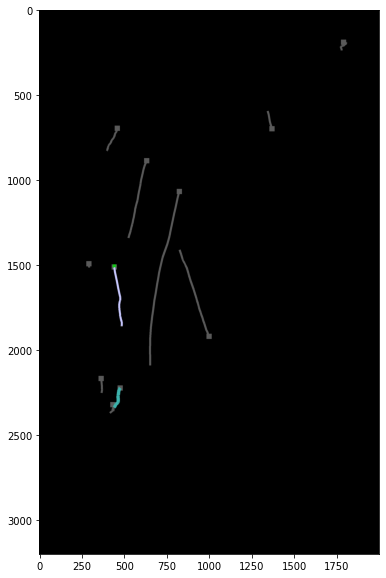

0 0:person, 1: motorcyc, 2: bicycle, 3:truck, 4: car


In [ ]:
scene_no = 119
agent_no = 5

collision_wise_scene_analysis(scene_no * dat2.wrap_around, agent_no, wide_view= True)

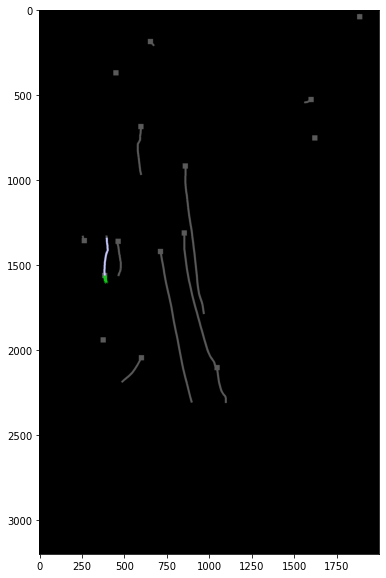

0 0:person, 1: motorcyc, 2: bicycle, 3:truck, 4: car


In [ ]:
scene_no = 550
agent_no = 5

collision_wise_scene_analysis(scene_no * dat2.wrap_around, agent_no, wide_view= True)

10.349712942231625
10.349712942231625


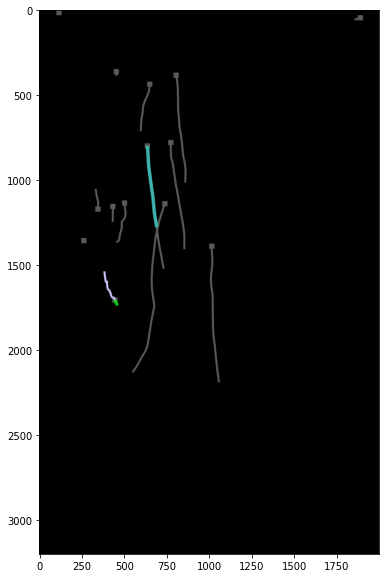

0 0:person, 1: motorcyc, 2: bicycle, 3:truck, 4: car


In [ ]:
scene_no = 580
agent_no = 5

collision_wise_scene_analysis(scene_no * dat2.wrap_around, agent_no, wide_view= True)

12.899612397277679
12.899612397277679


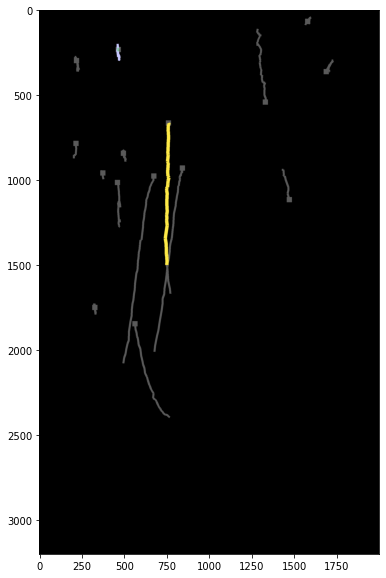

4 0:person, 1: motorcyc, 2: bicycle, 3:truck, 4: car


In [ ]:
scene_no = 340
agent_no = 5

collision_wise_scene_analysis(scene_no * dat2.wrap_around, agent_no, wide_view= True)

# Risk Prediction

In [ ]:
import cv2
from PIL import Image, ImageDraw
import matplotlib.pyplot as plt

In [ ]:
dat2 = PathDataset3(raw_data, PREDICT_SIZE, SCENE_SIZE)

In [ ]:
def get_r(x, y, a, b):
  r = ((a-x)**2 + (b - y) ** 2) ** .5
  return r

In [ ]:
def get_theta(x1, y1, x2, y2, a, b, cos = False, isRadial = True):
  if isRadial:
    if cos:
      return 1
    else:
      return 0

  A = [x2 - x1, y2 - y1]
  B = [a - x2, b - y2]
  
  Acap = A / np.linalg.norm(A)
  Bcap = B / np.linalg.norm(B)
  dot_product = np.dot(Acap, Bcap)
  if cos:
    return dot_product
    
  return np.arccos(dot_product)

In [ ]:
def get_weight(d, cos_theta, Wmax = 5, sigma = 200):
  return Wmax * np.exp(- (d/sigma)**2 ) * ((1 + cos_theta) / 2)

In [ ]:
def get_sigma_for_agent(agentType):
  distance_to_pixel_factor = 900/8
  if agentType == 1:    # Person
    return .5 * distance_to_pixel_factor
  elif agentType == 2:  # Motorcycle
    return .8 * distance_to_pixel_factor
  elif agentType == 3:  # Cycle
    return .7 * distance_to_pixel_factor
  elif agentType == 4:  # Truck
    return 1.5 * distance_to_pixel_factor
  else:                 # Car
    return 1.3 * distance_to_pixel_factor

In [ ]:
def get_agent_width(agentType):
  distance_to_pixel_factor = 900/8
  if agentType == 1:    # Person
    return .1 * distance_to_pixel_factor
  elif agentType == 2:  # Motorcycle
    return .8 * distance_to_pixel_factor
  elif agentType == 3:  # Cycle
    return .7 * distance_to_pixel_factor
  elif agentType == 4:  # Truck
    return 4 * distance_to_pixel_factor
  else:                 # Car
    return 2 * distance_to_pixel_factor

In [ ]:
def illustrate_scene_risk_prediction(item_no, agent_idx, dat = dat2, wide_view = False, transform = False, plot_weights = True, normalize = True):
    ## Prevents vertical transform so that viewing images is
    ## not an issue
    dat.set_vertical_transform(transform)
    normal_mode = True
    try:
      a, b, k = dat.getitem(item_no, agent_idx)
    except:
      normal_mode = False
      a,b, k, agent_id = dat.getitem(item_no, agent_idx)

    b = b[-PREDICT_SIZE:,:]
  
    a = a[k:, :]
    
    ln = a.shape[0]

    b = torch.tensor(b.reshape(1, PREDICT_SIZE, 2)).float()

    frame_count = dat.get_frame_idx(item_no)

    color = list(np.random.choice(range(256), size=10))

    if wide_view:
      multiplier = (3, 3, 1)
      shift = 1
    else:
      multiplier = (2, 3, 2)
      shift = .5

    img_top = Image.new("RGB", (900*multiplier[0], 1600*multiplier[1]//multiplier[2]))
    pildraw = ImageDraw.Draw(img_top)

    if normal_mode:
      for o in range(1, 14):
      # print(a[:, o * 7 + 5 : o * 7 + 7])
      # print('------------------------------------')
          for k in range(ln - PREDICT_SIZE - 1, 1, -1):
              if a[k-1, o * 7 + 5] == -1:
                  continue
              if a[k, o * 7 + 5] == -1:
                  break
              # print((1 - a[k, o * 7 + 5]), ', ', a[k, o*7 + 5])
              pt1 = (int((a[k-1, o * 7 + 5] + shift)  * dat.W), int((a[k-1, o * 7 + 6] + shift) * dat.H))
              pt2 = (int((a[k, o * 7 + 5] + shift) * dat.W), int((a[k, o * 7 + 6] + shift) * dat.H))
              
              
              pildraw.line(((pt1[0], pt1[1]), (pt2[0], pt2[1])), fill=(90, 90, 90), width = 12)
          pts = (a[-PREDICT_SIZE - 1, o * 7 + 5] + shift) * dat.W, (a[-PREDICT_SIZE - 1, o * 7 + 6] + shift) * dat.H 
          # print(pts)
          pildraw.rectangle(((pts[0]-15, pts[1]-15), (pts[0]+15, pts[1]+15)), fill=(90,90,90), width=1)


    else:
        scene_no = dat.get_frame_idx(item_no)
        agents = list(dat.agents_in_scene[scene_no].keys())

        for j, agent in enumerate(agents):
          end_frame = max(dat.raw_data[agent]['start'] - 1, scene_no - dat.scenes)
          lim_frame = scene_no - dat.predict

          if lim_frame > end_frame:
            pts = dat.agents_in_scene[lim_frame][agent]

            if agent in dat.agents_in_scene[lim_frame - 1].keys():
              if agent in dat.agents_in_scene[lim_frame - 2].keys():
                a1 = dat.agents_in_scene[lim_frame-1][agent]
                b1 = dat.agents_in_scene[lim_frame-2][agent]
                b1 = (pts[0] + b1[0])/2, (pts[1] + b1[1])/2
                lastPts = (a1[0] + b1[0])/2, (a1[1] + b1[1])/2

              else:
                lastPts = dat.agents_in_scene[lim_frame-1][agent]
            else:
              lastPts = pts

            isRadial = False
            if lastPts[0] == pts[0] and lastPts[1] == pts[1]:
              isRadial = True
            
            if dat.up:
              pts = pts[0], dat.H - pts[1]
              lastPts = lastPts[0], dat.H - lastPts[1]
            if dat.right : 
              pts = dat.W - pts[0], pts[1]
              lastPts = dat.W - lastPts[0], lastPts[1]

            pts = int(pts[0] + shift * dat.W), int(pts[1] + shift * dat.H)
            lastPts = int(lastPts[0] + shift * dat.W), int(lastPts[1] + shift * dat.H)

            pildraw.rectangle(((pts[0]-15, pts[1]-15), (pts[0]+15, pts[1]+15)), fill=(90,90,90), width=1) 

            agentType = dat.raw_data[agent]['type']
            sigma = get_sigma_for_agent(agentType)
            radiusZone = int(sigma / .8)
                  
          for scene in range(lim_frame, end_frame, -1):
            if scene == end_frame + 1:
              continue

            pt1 = dat.agents_in_scene[scene-1][agent]
            if dat.up:
              pt1 = pt1[0], dat.H - pt1[1]
            if dat.right : 
              pt1 = dat.W - pt1[0], pt1[1]
            pt1 = pt1[0] + shift * dat.W, pt1[1] + shift * dat.H



            pt2 = dat.agents_in_scene[scene][agent]
            if dat.up:
              pt2 = pt2[0], dat.H - pt2[1]
            if dat.right : 
              pt2 = dat.W - pt2[0], pt2[1]
            pt2 = pt2[0] + shift * dat.W, pt2[1] + shift * dat.H
        
            pildraw.line(((pt1[0], pt1[1]), (pt2[0], pt2[1])), fill=(90, 90, 90), width = 12)
        

        ## Next k scenes prediction to risk
        lim_frame = scene_no - dat.predict

        risk_values = {}
        positions = {}
        flattened_positions = {}

        for scene in range(lim_frame, scene_no):

          # Computing coordinates of agents
          for j, agent in enumerate(agents):
              end_frame = max(dat.raw_data[agent]['start'], scene_no - dat.scenes)
              if lim_frame > end_frame: 

                  pt1 = dat.agents_in_scene[scene+1][agent]
                  if dat.up:
                    pt1 = pt1[0], dat.H - pt1[1]
                  if dat.right : 
                    pt1 = dat.W - pt1[0], pt1[1]
                  pt1 = pt1[0] + shift * dat.W, pt1[1] + shift * dat.H



                  pt2 = dat.agents_in_scene[scene][agent]
                  if dat.up:
                    pt2 = pt2[0], dat.H - pt2[1]
                  if dat.right : 
                    pt2 = dat.W - pt2[0], pt2[1]
                  pt2 = pt2[0] + shift * dat.W, pt2[1] + shift * dat.H

                  if agent not in positions.keys():
                    pt = dat.agents_in_scene[scene - 1][agent]
                    if dat.up:
                      pt = pt[0], dat.H - pt[1]
                    if dat.right : 
                      pt = dat.W - pt[0], pt[1]
                    pt = pt[0] + shift * dat.W, pt[1] + shift * dat.H
                    positions[agent] = [pt]
                    flattened_positions[agent] = [pt]

                  positions[agent].append(pt2)
                  flattened_positions[agent].append(pt2)
                  
    
              
                  pildraw.line(((pt1[0], pt1[1]), (pt2[0], pt2[1])), fill=(20, 200, 25), width = 20)
          

          for a1 in positions.keys():
            p1 = positions[a1][-2]
            p2 = positions[a1][-1]

            if len(positions[a1]) > 2:
              p3 = positions[a1][-3]
              temp_p1 = (p3[0] + p2[0])/2, (p3[1] + p2[1])/2
              p1 = (p1[0] + temp_p1[0])/2, (p1[1] + temp_p1[1])/2
            else:
              continue

            p2 = p1
            p1 = flattened_positions[a1][-3]

            if normalize:
              flattened_positions[a1][-2] = p2
            
            

            isRadial = False
            if p1[0] == p2[0] and p1[1] == p2[1]:
              isRadial = True

            agentType = dat.raw_data[a1]['type']
            sigma = get_sigma_for_agent(agentType)
            if not isRadial:
              radiusZone = sigma / .8
            else:
              continue

            r1 = get_agent_width(agentType)

            for a2 in positions.keys():
              if a1 == a2 or (agentType == 1 and dat.raw_data[a2]['type'] == 1):
                continue
              pos = flattened_positions[a2][-2]
              
              r2 = get_agent_width(dat.raw_data[a2]['type'])

              d = max(get_r(*p2, *pos) - (r1 + r2), 0.01)
              theta = get_theta(*p1, *p2, *pos, True, isRadial = isRadial)

              try:
                w = get_weight(d, theta, sigma = sigma)
              except:
                w = 128
              
              id = str(a1) + ' ' + str(a2)
              if id not in risk_values.keys():
                risk_values[id] = [w]
              else:
                risk_values[id].append(w)
                dW = w - risk_values[id][-2]

                if w  > 4 and dW < .5:
                  pildraw.line((p2, pos), fill=(200, 20, 25), width = 20)
                elif w * dW > 1:
                  pildraw.line((p2, pos), fill=(150, 20, 65), width = 20)
                elif w * dW > .7:
                  pildraw.line((p2, pos), fill=(100, 20, 165), width = 20)

    
    plt.figure(figsize=(24,10))
    # print(np.array(img_top).shape)
    if not wide_view:
      plt.imshow(np.array(img_top)[:,500:])
    else:
      plt.imshow(np.array(img_top)[800:4000,500:2500])
    #     cv2.imwrite('trajectory/'+ str(frno).zfill(6) + '.png', np.array(pilimg))
    plt.show()

    return risk_values

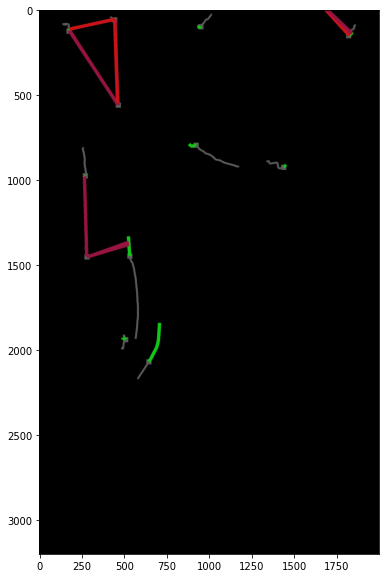

8 196  =>  [1.0791244333195893, 3.313689480660339, 3.8943686658754064, 3.87500495236798, 3.766590785877378, 3.5867905855435995]
8 204  =>  [1.8618869852537783, 1.105803916061429, 0.41978836039226464, 0.25281268948345503, 0.13399712671063865, 0.0544605610729548]
8 222  =>  [0.3393192570983956, 2.719151378878413, 4.065722312533872, 4.349939846457071, 4.5036294306209985, 4.5844437698919185]
15 218  =>  [2.1637406200516116, 2.1276439284693787, 2.0746535583798456, 2.1077660675240217, 2.2170963562489034, 2.6127706996702136]
23 189  =>  [0.23341909727720908, 0.0918180956186275, 0.10921815885982433, 0.10418855891811082, 2.1526194082873893, 3.2506113480198535]
23 204  =>  [1.0388884275185084, 0.9087618240546241, 0.4233563609538915, 0.36928161063602727, 1.3118867934387806, 1.3619005710554195]
189 23  =>  [2.8334091994196706, 2.5716205615487913, 2.3136294795358845, 2.1245876762745453, 1.9816953159911952, 1.8203199301709025]
189 204  =>  [0.4626490242091064, 0.6434834984672831, 0.8366640530850723,

In [ ]:
scene_no = 424
agent_no = 5

# illustrate_scene_analysis(scene_no * 7, agent_no, wide_view= True, plot_weights = False)
risk_values = illustrate_scene_risk_prediction(scene_no * dat2.wrap_around, agent_no, wide_view= True)

for pair, risks in risk_values.items():
  if any(i > 1 for i in risks):
    print(pair, ' => ', risks)

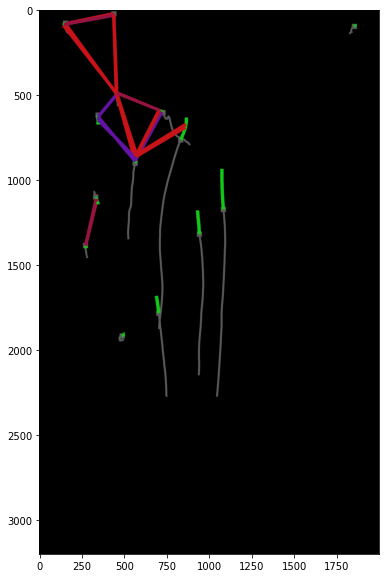

8 196  =>  [3.548645278327694, 4.017770462213052, 4.0659192076745665, 4.1161332481618915, 4.087461168288343, 3.953027590846337]
8 200  =>  [1.6183309970134108, 0.7867300579834857, 0.7939289052682668, 0.8743480427253557, 0.9988607048666923, 1.294212865478265]
8 222  =>  [4.830243688081615, 4.768378614928424, 4.7913096000086055, 4.8635708389580135, 4.932906030633957, 4.990297702061368]
8 253  =>  [0.4568494270339907, 1.192312311817179, 1.0856503181840829, 0.9129685342503354, 0.7297465862409558, 0.46510724167497247]
23 189  =>  [2.6191824379278104, 2.135604198650565, 0.8014729537897056, 0.4517199020167574, 0.2317345410090261, 0.13322031339998072]
23 252  =>  [4.306510245435353, 3.5035075970905276, 1.1332323072223276, 0.6418795566783062, 0.3240022371502166, 0.2070970157311042]
189 8  =>  [4.765607479512044, 4.788626139849681, 4.801421720015349, 4.779098574990385, 4.733875425761757, 4.6872871484455665]
189 200  =>  [2.9585002123726443, 3.1744245227880503, 3.426490132499706, 3.65569420924976

In [ ]:
scene_no = 464
agent_no = 5

# illustrate_scene_analysis(scene_no * 7, agent_no, wide_view= True, plot_weights = False)
risk_values = illustrate_scene_risk_prediction(scene_no * dat2.wrap_around, agent_no, wide_view= True)

for pair, risks in risk_values.items():
  if any(i > 1 for i in risks):
    print(pair, ' => ', risks)

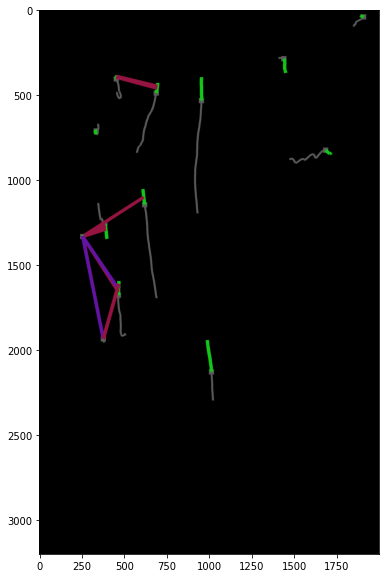

8 189  =>  [0.7500950029810394, 0.9475750357955001, 1.4075233049675786, 2.2628963384303806, 3.3033548726599897, 3.8237837789568205]
23 216  =>  [0.08642575190204076, 1.6729578181919469, 2.0537568149760204, 0.10192558659049376, 0.11460449069226725, 0.1196309995825139]
23 238  =>  [2.1154264956538644, 1.857247699866329, 1.0622587924180564, 1.6966512431250802, 1.6272126136723835, 1.5565831601459477]
23 252  =>  [3.672400377708461, 3.3093969423634433, 2.2652444407217525, 2.7736028690590726, 2.326397891136194, 1.867245510693157]
23 264  =>  [0.009763662090264427, 1.2855891920297104, 1.3938105112450903, 2.728276081128239e-08, 9.263652700007472e-06, 0.00012740558708074914]
189 8  =>  [2.805356968705347, 2.7761236538628546, 2.8122709774505776, 2.861857899789662, 2.8103308304165733, 2.711964533496694]
189 236  =>  [2.625523105022885, 2.6748785564708193, 2.672316933865179, 2.677109570188866, 2.8063802530214486, 2.9768413913083327]
236 189  =>  [2.87375644588629, 2.7991947470063834, 2.73268822208

In [ ]:
scene_no = 504
agent_no = 5

# illustrate_scene_analysis(scene_no * 7, agent_no, wide_view= True, plot_weights = False)
risk_values = illustrate_scene_risk_prediction(scene_no * dat2.wrap_around, agent_no, wide_view= True)

for pair, risks in risk_values.items():
  if any(i > 1 for i in risks):
    print(pair, ' => ', risks)

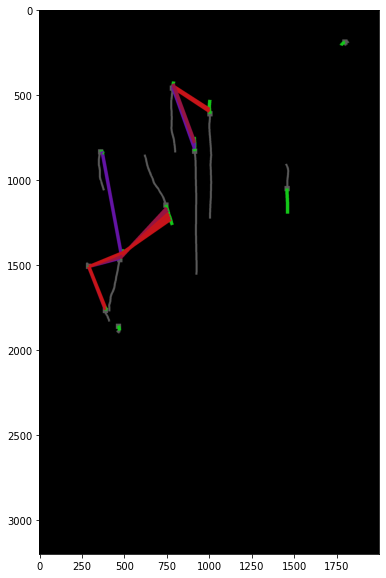

1 2  =>  [3.1208784365192, 3.1628215677316103, 3.258366402291278, 3.296264695929942, 3.25008353612118, 3.225157589691079]
1 7  =>  [2.296520199155395, 2.60459095660823, 2.8623787720265526, 3.1128034570293877, 3.4564650817693403, 3.8071590582526156]
2 7  =>  [4.019624518204977, 4.03514770321603, 4.033313670556183, 3.9456807414566937, 3.7754572414556478, 3.6118298242523594]
6 9  =>  [0.9564201940162083, 1.3853610228355007, 1.8826582993633474, 2.3615745448722736, 2.756706128549331, 3.0027471131292667]
7 2  =>  [1.1565745792452764, 1.2614629258011405, 1.4601053502957575, 1.699934805143486, 1.9254533860812417, 1.8644737469826473]
8 7  =>  [2.540468804319054, 2.5869300542610953, 2.5604525618837033, 1.5690216688749445, 1.0967834384331732, 1.0164286583880568]
8 9  =>  [0.0546024991822588, 0.09961019406049063, 0.38744174085624794, 1.0623306708146534, 1.4224190494839695, 1.6986709382378906]
9 6  =>  [2.804968982567886, 3.2495661258200674, 3.7167740378749765, 4.125765024882701, 4.428795584800557,

In [ ]:
scene_no = 70
agent_no = 5

# illustrate_scene_analysis(scene_no * 7, agent_no, wide_view= True, plot_weights = False)
risk_values = illustrate_scene_risk_prediction(scene_no * dat2.wrap_around, agent_no, wide_view= True)

for pair, risks in risk_values.items():
  if any(i > 1 for i in risks):
    print(pair, ' => ', risks)